# **General Prep**

In [1]:
#pip install pingouin

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import pingouin as pg
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from statsmodels.stats.stattools import durbin_watson

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [4]:
os.chdir('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/master_thesis/study2')

# **Data Preperation**

In [5]:
file_loc = 'raw/Study2_June_14_2024_17.29_final.xlsx'
df = pd.read_excel(file_loc)
df

ResponseId  Ads_OP_1  Ads_OP_2  Ads_OP_3  Ads_OP_4  \
0          {{%PROLIFIC_PID%}}        30         0        45        31   
1    5e49c48fac17f4000c1bfcbc        50        54        50        50   
2    5f38251e3cec500d267efb92        20        15        30        25   
3    5cd043b25b04850017e5d028         1        13        10        11   
4    63d37e4ea0985c4dc486ff8e        60        40        60        60   
..                        ...       ...       ...       ...       ...   
129  648343299ec8050d10aee27d         0         0         0         0   
130  6601b51675d287d6a62f11c4        82        78        90        94   
131  5daf506a5bd1b30013605e31        60        70       100       100   
132  656f2e99bd2939f9b3f9d090        87        86        86        82   
133  6658822c0f5b1367a1585ee1        99        90       100       100   

     Ads_OP_5  Ads_OP_6  Ads_CO_1  Ads_CO_2  Ads_CO_3  Ads_CO_4  Ads_CO_5  \
0          46        47        45         0        37        47        42   
1          58        51        42        54        61        61        64   
2          30        15        75        80        79        90        77   
3           6         6        50        50        39         0        50   
4          70        70        40        40        40        30        30   
..        ...       ...       ...       ...       ...       ...       ...   
129         0         0        20        61        20        60        10   
130        97       100        86        82        86        90        93   
131       100       100       100        80        75        90        70   
132        83        82        72        72        72        76        75   
133       100       100        20        50        10        10        10   

     Ads_CO_6  Ads_EX_1  Ads_EX_2  Ads_EX_3  Ads_EX_4  Ads_EX_5  Ads_EX_6  \
0          43        37        46        41        43        42        45   
1          67        18        50        23        21        15         8   
2          85        80        85        97        89        82       100   
3          50         3         4         3         2         4         4   
4          30        70        70        80        80        80        80   
..        ...       ...       ...       ...       ...       ...       ...   
129         1         0         0         0         0         0         0   
130        97        91        85        92       100       100       100   
131        50        90        85        95        50        95       100   
132        77        91        83        86        86        87        90   
133         0        80        50        70        60        90        80   

     Ads_AG_1  Ads_AG_2  Ads_AG_3  Ads_AG_4  Ads_AG_5  Ads_AG_6  Cha_OP_1  \
0          55        44        40        41        40        46        50   
1          58        50        65        61        52        55        65   
2          73        73        83        71        74        90        95   
3          89        93        98       100       100       100        70   
4          40        20        20        20        40        30        60   
..        ...       ...       ...       ...       ...       ...       ...   
129       100       100       100       100       100       100       100   
130        30        15        10        10         6         0        91   
131        20        35        15        25        25        20       100   
132        76        74        77        75        77        79        92   
133        31        50        40        30        25        25        80   

     Cha_OP_2  Cha_OP_3  Cha_OP_4  Cha_OP_5  Cha_OP_6  Cha_OP_7  Cha_CO_1  \
0          61        66        68        71        64        63        60   
1          74        88        85        58        59        59        75   
2          84       100       100       100        90       100        88   
3          70        76        81        89        88      

In [6]:
# Exclude invalid participants
preview_ids = ['{{%PROLIFIC_PID%}}']
pilot_ids = ['5e49c48fac17f4000c1bfcbc', '5f38251e3cec500d267efb92', '5cd043b25b04850017e5d028', '63d37e4ea0985c4dc486ff8e', '6565fff05ec125a5ff77a77c',
             '6146eadbe88132805e5e3139', '5b987c55bb32a600018302dc', '5f00b44e836b900755d6da5c', '60f5569b3a95a18a91dc5d21']
answer_not_valid_ids = ['65e33239b5fa3ca93950aa67', '5dbc46b70338051eb7999760', '640c92a322b87202716ce6a6', '65c017a404cde4687fdad22e', '5c6d7db58f6257000148f61d',
                        '5916bba1c40353000150c46c', '5efb31fa8cd32f04bf048643', '646792a49a85f35e7a7f5169', '664f9c1098a3ae9c463e6879', '643adb4a213b87bfc7e21e3f',
                        '662c62abadd0ff2671ea8876', '66188b0cd0f8a01345be56e7', '65d306f8b16eb5011ccb2025', '66350027a37d96b687525725', '6476122c3edb0289e7d0efb2',
                        '664decb8e9c4c9c4c3359ac8', '65f1b8db932f5ad974458e46', '6668fd75b5b602c2f510599a', '648343299ec8050d10aee27d', '5daf506a5bd1b30013605e31']

invalid_ids = preview_ids + pilot_ids + answer_not_valid_ids

print(f"original shape {df.shape}")
df = df[~df['ResponseId'].isin(invalid_ids)]
print(f"final df shape {df.shape}")

original shape (134, 89)
final df shape (104, 89)


In [7]:
print(df['ResponseId'].tolist())

['641c2b936dc70fab01d77dc6', '641357b26802e397b5627d5e', '66294a585f1cf3fdaeb80120', '661571d6cc16ee34676734df', '6629f95a14b6006e6a4b0aef', '66463d8b1984a328f78252d7', '5d215a1bbf7f840019701939', '6660680acd027329cecdf2b8', '6601c47dbc5b1b7c9f1b3fde', '6634e6202da0719ae4ec6455', '661f1144d35ac5240e53ad3f', '665a52573b9527ce0011158b', '5d42486206811e001ada5b4b', '6627f4487b8bd8d14031349a', '5e28e8730fd86a0a19e084cd', '661ff00c03ba28739dd3fbef', '6647c6138ad0a72e618533d0', '5d951ede9b6f880018f63b6e', '646778f0d6b43cbeb4501454', '651f0d6c26e75447ae818a36', '5d9b7f29654a3102c8112b63', '5fe508e86079e12a8a3b2427', '663192b96ab56cf1635615b7', '651ebcca48c60acc82f1f2bd', '5b757a03976ecb0001b1168f', '611343cebd1f50c6a0eaaf8c', '66512f7075174757b10eab2d', '605733fb52820cc2a723fea3', '5f51587f36e91f38fbf34c23', '63d5daa80d80a745de740c13', '5afe053059ae1e00017e6a3c', '663b7b92f00b34547fe5ed81', '6669a1aedfa639b507eccff6', '60b49cb1dc5470789edd23fe', '665204dff160a84b66153ace', '65ff8f036cb8021430

In [8]:
df

ResponseId  Ads_OP_1  Ads_OP_2  Ads_OP_3  Ads_OP_4  \
10   641c2b936dc70fab01d77dc6        73        74        76        74   
11   641357b26802e397b5627d5e        75        77        87        85   
12   66294a585f1cf3fdaeb80120        30        30        27        45   
13   661571d6cc16ee34676734df        54        45        54        56   
14   6629f95a14b6006e6a4b0aef        63        65        63        64   
..                        ...       ...       ...       ...       ...   
127  60a062ed4c4334abbbf32323        93        61        84        84   
128  5f3ac1732efa0a74f975b1a8        10        40        20         0   
130  6601b51675d287d6a62f11c4        82        78        90        94   
132  656f2e99bd2939f9b3f9d090        87        86        86        82   
133  6658822c0f5b1367a1585ee1        99        90       100       100   

     Ads_OP_5  Ads_OP_6  Ads_CO_1  Ads_CO_2  Ads_CO_3  Ads_CO_4  Ads_CO_5  \
10         76        81        85       100        80        82        88   
11         90        76        50        43        45        42        38   
12         55        34        81        72        81        63        60   
13         56        54        45        48        45        47        47   
14         59        62        35        34        36        37        38   
..        ...       ...       ...       ...       ...       ...       ...   
127        87        88        77        91        94        73        82   
128         0         0        50       100        80        65        91   
130        97       100        86        82        86        90        93   
132        83        82        72        72        72        76        75   
133       100       100        20        50        10        10        10   

     Ads_CO_6  Ads_EX_1  Ads_EX_2  Ads_EX_3  Ads_EX_4  Ads_EX_5  Ads_EX_6  \
10          0        73        75        84        82       100        84   
11         39        84        79        87        75        79        77   
12         85        82        56        81        65        75        86   
13         47        48        48        47        54        54        55   
14         39        60        58        58        59        58        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        79         9        27        21        60        60        50   
128       100        90       100       100         0         0       100   
130        97        91        85        92       100       100       100   
132        77        91        83        86        86        87        90   
133         0        80        50        70        60        90        80   

     Ads_AG_1  Ads_AG_2  Ads_AG_3  Ads_AG_4  Ads_AG_5  Ads_AG_6  Cha_OP_1  \
10         82        82        87        92       100        93        86   
11         12        14        32        24        14         9        32   
12         82        59        74        57        65        79        69   
13         43        42        46        45        45        45        59   
14         41        41        39        38        38        39        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        28        63        33        64        36        37        81   
128        30        65         9         1         0         0        83   
130        30        15        10        10         6         0        91   
132        76        74        77        75        77        79        92   
133        31        50        40        30        25        25        80   

     Cha_OP_2  Cha_OP_3  Cha_OP_4  Cha_OP_5  Cha_OP_6  Cha_OP_7  Cha_CO_1  \
10         85        89       100       100       100       100       100   
11         26        28        26        31        14        32        21   
12         55        81        89        78        70        85        82   
13         58        55        56        56        55      

In [9]:
socioecono_columns = ['gender',	'age',	'education', 'race', 'employment', 'income']

In [10]:
all_columns = df.columns.tolist()
ads_columns = [col for col in all_columns if col.split('_')[0] == 'Ads' ]
chat_columns = [col for col in all_columns if col.split('_')[0] == 'Cha' ]

In [11]:
ads_df = df[['ResponseId'] + ads_columns]
ads_df

ResponseId  Ads_OP_1  Ads_OP_2  Ads_OP_3  Ads_OP_4  \
10   641c2b936dc70fab01d77dc6        73        74        76        74   
11   641357b26802e397b5627d5e        75        77        87        85   
12   66294a585f1cf3fdaeb80120        30        30        27        45   
13   661571d6cc16ee34676734df        54        45        54        56   
14   6629f95a14b6006e6a4b0aef        63        65        63        64   
..                        ...       ...       ...       ...       ...   
127  60a062ed4c4334abbbf32323        93        61        84        84   
128  5f3ac1732efa0a74f975b1a8        10        40        20         0   
130  6601b51675d287d6a62f11c4        82        78        90        94   
132  656f2e99bd2939f9b3f9d090        87        86        86        82   
133  6658822c0f5b1367a1585ee1        99        90       100       100   

     Ads_OP_5  Ads_OP_6  Ads_CO_1  Ads_CO_2  Ads_CO_3  Ads_CO_4  Ads_CO_5  \
10         76        81        85       100        80        82        88   
11         90        76        50        43        45        42        38   
12         55        34        81        72        81        63        60   
13         56        54        45        48        45        47        47   
14         59        62        35        34        36        37        38   
..        ...       ...       ...       ...       ...       ...       ...   
127        87        88        77        91        94        73        82   
128         0         0        50       100        80        65        91   
130        97       100        86        82        86        90        93   
132        83        82        72        72        72        76        75   
133       100       100        20        50        10        10        10   

     Ads_CO_6  Ads_EX_1  Ads_EX_2  Ads_EX_3  Ads_EX_4  Ads_EX_5  Ads_EX_6  \
10          0        73        75        84        82       100        84   
11         39        84        79        87        75        79        77   
12         85        82        56        81        65        75        86   
13         47        48        48        47        54        54        55   
14         39        60        58        58        59        58        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        79         9        27        21        60        60        50   
128       100        90       100       100         0         0       100   
130        97        91        85        92       100       100       100   
132        77        91        83        86        86        87        90   
133         0        80        50        70        60        90        80   

     Ads_AG_1  Ads_AG_2  Ads_AG_3  Ads_AG_4  Ads_AG_5  Ads_AG_6  
10         82        82        87        92       100        93  
11         12        14        32        24        14         9  
12         82        59        74        57        65        79  
13         43        42        46        45        45        45  
14         41        41        39        38        38        39  
..        ...       ...       ...       ...       ...       ...  
127        28        63        33        64        36        37  
128        30        65         9         1         0         0  
130        30        15        10        10         6         0  
132        76        74        77        75        77        79  
133        31        50        40        30        25        25  

[104 rows x 25 columns]

In [12]:
chat_df = df[['ResponseId'] + chat_columns]
chat_df

ResponseId  Cha_OP_1  Cha_OP_2  Cha_OP_3  Cha_OP_4  \
10   641c2b936dc70fab01d77dc6        86        85        89       100   
11   641357b26802e397b5627d5e        32        26        28        26   
12   66294a585f1cf3fdaeb80120        69        55        81        89   
13   661571d6cc16ee34676734df        59        58        55        56   
14   6629f95a14b6006e6a4b0aef        59        60        61        58   
..                        ...       ...       ...       ...       ...   
127  60a062ed4c4334abbbf32323        81        91        82        86   
128  5f3ac1732efa0a74f975b1a8        83        50        52        70   
130  6601b51675d287d6a62f11c4        91        93        95        98   
132  656f2e99bd2939f9b3f9d090        92        92        90        93   
133  6658822c0f5b1367a1585ee1        80        40        80        90   

     Cha_OP_5  Cha_OP_6  Cha_OP_7  Cha_CO_1  Cha_CO_2  Cha_CO_3  Cha_CO_4  \
10        100       100       100       100       100        89       100   
11         31        14        32        21        17        15        19   
12         78        70        85        82        62        80        91   
13         56        55        57        61        64        60        60   
14         58        60        61        62        58        60        60   
..        ...       ...       ...       ...       ...       ...       ...   
127        89        89        88        86        87        90        87   
128        50        50        63        82       100        82       100   
130        98        99        99        92        92        95        97   
132        91        93        94        80        84        87        86   
133       100       100       100       100       100       100       100   

     Cha_CO_5  Cha_CO_6  Cha_CO_7  Cha_EX_1  Cha_EX_2  Cha_EX_3  Cha_EX_4  \
10         90       100       100       100        87        81        83   
11         31        21        23        32        30        42        27   
12         76        71        89        74        66        84        78   
13         63        54        54        58        53        53        62   
14         59        64        59        62        62        59        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        93        93        84       100        98        93        95   
128         0         0        88        50        50        58        67   
130        99        99        98        93        95        96        97   
132        84        87        87        85        84        88        88   
133       100       100       100        90       100       100        85   

     Cha_EX_5  Cha_EX_6  Cha_EX_7  Cha_AG_1  Cha_AG_2  Cha_AG_3  Cha_AG_4  \
10         91        74        89        85        78        96        80   
11         33        35        38        50        50        50        53   
12         76        67        90        71        70        64        77   
13         67        62        55        57        54        55        64   
14         59        56        60        58        61        59        62   
..        ...       ...       ...       ...       ...       ...       ...   
127        96        93        90        98        85        90        89   
128         0         0        58        60        83       100        85   
130       100        99        98        92        95        93        96   
132        86        87        89        92        84        87        86   
133       100       100       100        80        60       100        99   

     Cha_AG_5  Cha_AG_6  Cha_AG_7  
10         93       100        89  
11         52        34        36  
12         70        66        75  
13         70        55        54  
14         68        58        61  
..        ...       ...       ...  
127        91        97       100  
128         0         0        66  
130        99        99        95  
132    

In [13]:
socioecono_df = df[['ResponseId'] + socioecono_columns]
socioecono_df

ResponseId  gender  age  education  race  employment  \
10   641c2b936dc70fab01d77dc6       1   34          4     2           5   
11   641357b26802e397b5627d5e       1   36          5     1           7   
12   66294a585f1cf3fdaeb80120       2   48          5     1           6   
13   661571d6cc16ee34676734df       2   41          4     1           5   
14   6629f95a14b6006e6a4b0aef       2   48          2     1           1   
..                        ...     ...  ...        ...   ...         ...   
127  60a062ed4c4334abbbf32323       2   27          4     2           1   
128  5f3ac1732efa0a74f975b1a8       2   30          2     1           6   
130  6601b51675d287d6a62f11c4       2   55          5     2           9   
132  656f2e99bd2939f9b3f9d090       1   43          5     2           7   
133  6658822c0f5b1367a1585ee1       2   43          5     2           7   

     income  
10        1  
11        7  
12       11  
13        5  
14        9  
..      ...  
127       1  
128       5  
130      11  
132      12  
133       8  

[104 rows x 7 columns]

In [14]:
socioecono_df.to_csv('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/master_thesis/study3/raw/socioecono_scores.csv', index=False)

In [15]:
print(f"mean age {socioecono_df['age'].mean()} with sd {socioecono_df['age'].std()}, female % {socioecono_df[socioecono_df['gender']==1]['gender'].sum()/socioecono_df.shape[0]}")

mean age 40.13461538461539 with sd 11.586783307866355, female % 0.49038461538461536


In [16]:
for col in ['education', 'race', 'employment']:
    print(socioecono_df[col].value_counts())

education
4    48
2    22
5    21
3    11
6     2
Name: count, dtype: int64
race
1    70
2    23
4     4
6     4
3     2
0     1
Name: count, dtype: int64
employment
7    55
5    11
1    10
6     9
4     6
3     6
2     3
8     2
0     1
9     1
Name: count, dtype: int64


In [17]:
race_simplify = [4, 6, 3, 0]
employment_simplify = [4, 3, 2, 8, 0, 9]

socioecono_df['race'] = np.where(socioecono_df['race'].isin(race_simplify), 99, socioecono_df['race'])
socioecono_df['employment'] = np.where(socioecono_df['employment'].isin(employment_simplify), 99, socioecono_df['employment'])

In [18]:
for col in ['education', 'race', 'employment']:
    print(socioecono_df[col].value_counts())

education
4    48
2    22
5    21
3    11
6     2
Name: count, dtype: int64
race
1     70
2     23
99    11
Name: count, dtype: int64
employment
7     55
99    19
5     11
1     10
6      9
Name: count, dtype: int64


In [19]:
['ResponseId'] + socioecono_columns

['ResponseId', 'gender', 'age', 'education', 'race', 'employment', 'income']

In [20]:
df.isna().sum()

ResponseId    0
Ads_OP_1      0
Ads_OP_2      0
Ads_OP_3      0
Ads_OP_4      0
             ..
age           0
education     0
race          0
employment    0
income        0
Length: 89, dtype: int64

## Transform df (responses)

In [21]:
ads_perceived_personalization = [1]
ads_perceived_credibility = [2]
ads_overall_attitude = [3,4,5]
ads_engagement = [6]

In [22]:
chat_perceived_personalization = [1]
chat_trust = [2,3]
chat_satisfaction = [4]
chat_positive_emotion = [5]
chat_engagement = [6,7]

In [23]:
ads_df

ResponseId  Ads_OP_1  Ads_OP_2  Ads_OP_3  Ads_OP_4  \
10   641c2b936dc70fab01d77dc6        73        74        76        74   
11   641357b26802e397b5627d5e        75        77        87        85   
12   66294a585f1cf3fdaeb80120        30        30        27        45   
13   661571d6cc16ee34676734df        54        45        54        56   
14   6629f95a14b6006e6a4b0aef        63        65        63        64   
..                        ...       ...       ...       ...       ...   
127  60a062ed4c4334abbbf32323        93        61        84        84   
128  5f3ac1732efa0a74f975b1a8        10        40        20         0   
130  6601b51675d287d6a62f11c4        82        78        90        94   
132  656f2e99bd2939f9b3f9d090        87        86        86        82   
133  6658822c0f5b1367a1585ee1        99        90       100       100   

     Ads_OP_5  Ads_OP_6  Ads_CO_1  Ads_CO_2  Ads_CO_3  Ads_CO_4  Ads_CO_5  \
10         76        81        85       100        80        82        88   
11         90        76        50        43        45        42        38   
12         55        34        81        72        81        63        60   
13         56        54        45        48        45        47        47   
14         59        62        35        34        36        37        38   
..        ...       ...       ...       ...       ...       ...       ...   
127        87        88        77        91        94        73        82   
128         0         0        50       100        80        65        91   
130        97       100        86        82        86        90        93   
132        83        82        72        72        72        76        75   
133       100       100        20        50        10        10        10   

     Ads_CO_6  Ads_EX_1  Ads_EX_2  Ads_EX_3  Ads_EX_4  Ads_EX_5  Ads_EX_6  \
10          0        73        75        84        82       100        84   
11         39        84        79        87        75        79        77   
12         85        82        56        81        65        75        86   
13         47        48        48        47        54        54        55   
14         39        60        58        58        59        58        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        79         9        27        21        60        60        50   
128       100        90       100       100         0         0       100   
130        97        91        85        92       100       100       100   
132        77        91        83        86        86        87        90   
133         0        80        50        70        60        90        80   

     Ads_AG_1  Ads_AG_2  Ads_AG_3  Ads_AG_4  Ads_AG_5  Ads_AG_6  
10         82        82        87        92       100        93  
11         12        14        32        24        14         9  
12         82        59        74        57        65        79  
13         43        42        46        45        45        45  
14         41        41        39        38        38        39  
..        ...       ...       ...       ...       ...       ...  
127        28        63        33        64        36        37  
128        30        65         9         1         0         0  
130        30        15        10        10         6         0  
132        76        74        77        75        77        79  
133        31        50        40        30        25        25  

[104 rows x 25 columns]

## drop responses that contain na value within column(s) that cannot be remedied through averaging with other columns

In [24]:
ads_overall_attitude_cols = []
for col in ads_columns:
    id = int(col.split('_')[2])
    if ads_overall_attitude.__contains__(id):
        ads_overall_attitude_cols.append(col)
    else:
        ads_df.dropna(subset=[col], inplace= True)

In [25]:
ads_df

ResponseId  Ads_OP_1  Ads_OP_2  Ads_OP_3  Ads_OP_4  \
10   641c2b936dc70fab01d77dc6        73        74        76        74   
11   641357b26802e397b5627d5e        75        77        87        85   
12   66294a585f1cf3fdaeb80120        30        30        27        45   
13   661571d6cc16ee34676734df        54        45        54        56   
14   6629f95a14b6006e6a4b0aef        63        65        63        64   
..                        ...       ...       ...       ...       ...   
127  60a062ed4c4334abbbf32323        93        61        84        84   
128  5f3ac1732efa0a74f975b1a8        10        40        20         0   
130  6601b51675d287d6a62f11c4        82        78        90        94   
132  656f2e99bd2939f9b3f9d090        87        86        86        82   
133  6658822c0f5b1367a1585ee1        99        90       100       100   

     Ads_OP_5  Ads_OP_6  Ads_CO_1  Ads_CO_2  Ads_CO_3  Ads_CO_4  Ads_CO_5  \
10         76        81        85       100        80        82        88   
11         90        76        50        43        45        42        38   
12         55        34        81        72        81        63        60   
13         56        54        45        48        45        47        47   
14         59        62        35        34        36        37        38   
..        ...       ...       ...       ...       ...       ...       ...   
127        87        88        77        91        94        73        82   
128         0         0        50       100        80        65        91   
130        97       100        86        82        86        90        93   
132        83        82        72        72        72        76        75   
133       100       100        20        50        10        10        10   

     Ads_CO_6  Ads_EX_1  Ads_EX_2  Ads_EX_3  Ads_EX_4  Ads_EX_5  Ads_EX_6  \
10          0        73        75        84        82       100        84   
11         39        84        79        87        75        79        77   
12         85        82        56        81        65        75        86   
13         47        48        48        47        54        54        55   
14         39        60        58        58        59        58        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        79         9        27        21        60        60        50   
128       100        90       100       100         0         0       100   
130        97        91        85        92       100       100       100   
132        77        91        83        86        86        87        90   
133         0        80        50        70        60        90        80   

     Ads_AG_1  Ads_AG_2  Ads_AG_3  Ads_AG_4  Ads_AG_5  Ads_AG_6  
10         82        82        87        92       100        93  
11         12        14        32        24        14         9  
12         82        59        74        57        65        79  
13         43        42        46        45        45        45  
14         41        41        39        38        38        39  
..        ...       ...       ...       ...       ...       ...  
127        28        63        33        64        36        37  
128        30        65         9         1         0         0  
130        30        15        10        10         6         0  
132        76        74        77        75        77        79  
133        31        50        40        30        25        25  

[104 rows x 25 columns]

In [26]:
chat_trust_cols = []
chat_engagement_cols = []

for col in chat_columns:
    id = int(col.split('_')[2])
    if chat_trust.__contains__(id):
        chat_trust_cols.append(col)
    elif chat_engagement.__contains__(id):
        chat_engagement_cols.append(col)
    else:
        chat_df.dropna(subset=[col], inplace= True)

In [27]:
chat_df

ResponseId  Cha_OP_1  Cha_OP_2  Cha_OP_3  Cha_OP_4  \
10   641c2b936dc70fab01d77dc6        86        85        89       100   
11   641357b26802e397b5627d5e        32        26        28        26   
12   66294a585f1cf3fdaeb80120        69        55        81        89   
13   661571d6cc16ee34676734df        59        58        55        56   
14   6629f95a14b6006e6a4b0aef        59        60        61        58   
..                        ...       ...       ...       ...       ...   
127  60a062ed4c4334abbbf32323        81        91        82        86   
128  5f3ac1732efa0a74f975b1a8        83        50        52        70   
130  6601b51675d287d6a62f11c4        91        93        95        98   
132  656f2e99bd2939f9b3f9d090        92        92        90        93   
133  6658822c0f5b1367a1585ee1        80        40        80        90   

     Cha_OP_5  Cha_OP_6  Cha_OP_7  Cha_CO_1  Cha_CO_2  Cha_CO_3  Cha_CO_4  \
10        100       100       100       100       100        89       100   
11         31        14        32        21        17        15        19   
12         78        70        85        82        62        80        91   
13         56        55        57        61        64        60        60   
14         58        60        61        62        58        60        60   
..        ...       ...       ...       ...       ...       ...       ...   
127        89        89        88        86        87        90        87   
128        50        50        63        82       100        82       100   
130        98        99        99        92        92        95        97   
132        91        93        94        80        84        87        86   
133       100       100       100       100       100       100       100   

     Cha_CO_5  Cha_CO_6  Cha_CO_7  Cha_EX_1  Cha_EX_2  Cha_EX_3  Cha_EX_4  \
10         90       100       100       100        87        81        83   
11         31        21        23        32        30        42        27   
12         76        71        89        74        66        84        78   
13         63        54        54        58        53        53        62   
14         59        64        59        62        62        59        59   
..        ...       ...       ...       ...       ...       ...       ...   
127        93        93        84       100        98        93        95   
128         0         0        88        50        50        58        67   
130        99        99        98        93        95        96        97   
132        84        87        87        85        84        88        88   
133       100       100       100        90       100       100        85   

     Cha_EX_5  Cha_EX_6  Cha_EX_7  Cha_AG_1  Cha_AG_2  Cha_AG_3  Cha_AG_4  \
10         91        74        89        85        78        96        80   
11         33        35        38        50        50        50        53   
12         76        67        90        71        70        64        77   
13         67        62        55        57        54        55        64   
14         59        56        60        58        61        59        62   
..        ...       ...       ...       ...       ...       ...       ...   
127        96        93        90        98        85        90        89   
128         0         0        58        60        83       100        85   
130       100        99        98        92        95        93        96   
132        86        87        89        92        84        87        86   
133       100       100       100        80        60       100        99   

     Cha_AG_5  Cha_AG_6  Cha_AG_7  
10         93       100        89  
11         52        34        36  
12         70        66        75  
13         70        55        54  
14         68        58        61  
..        ...       ...       ...  
127        91        97       100  
128         0         0        66  
130        99        99        95  
132    

## translating the responses to features

In [28]:
big5_types = ['OP', 'CO', 'EX', 'AG']

In [29]:
#ads_perceived_personalization = [1]
#ads_perceived_credibility = [2]
#ads_overall_attitude = [3,4,5]
#ads_engagement = [6]

ads_dict = {'ResponseId': ads_df['ResponseId']}
ads_overall_attitudecronbach_alpha_dict = {}

for col in ads_columns:
    type_part = col.split('_')[1]
    id_part = int(col.split('_')[2])
    
    for big5_type in big5_types:
        if type_part == big5_type:
            if id_part == 1:
                col_name = 'perceived_personalization_' + big5_type
                if col_name not in ads_dict:
                    ads_dict[col_name] = ads_df[col]
                else:
                    ads_dict[col_name] = pd.concat([ads_dict[col_name], ads_df[col]], axis=1)
                
            elif id_part == 2:
                col_name = 'perceived_credibility_' + big5_type
                if col_name not in ads_dict:
                    ads_dict[col_name] = ads_df[col]
                else:
                    ads_dict[col_name] = pd.concat([ads_dict[col_name], ads_df[col]], axis=1)
                
            elif id_part in [3, 4, 5]:
                col_name = 'overall_attitude_' + big5_type
                cols_to_mean = ['Ads_' + big5_type + '_3', 'Ads_' + big5_type + '_4', 'Ads_' + big5_type + '_5']
                if col_name not in ads_dict:
                    ads_dict[col_name] = ads_df[cols_to_mean].mean(axis=1).astype(int)
                
                # Calculate Cronbach's Alpha
                cronbach_alpha = pg.cronbach_alpha(data=ads_df[cols_to_mean])[0]
                ads_overall_attitudecronbach_alpha_dict[big5_type] = cronbach_alpha
                
            else:
                col_name = 'ads_engagement_' + big5_type
                if col_name not in ads_dict:
                    ads_dict[col_name] = ads_df[col]
                else:
                    ads_dict[col_name] = pd.concat([ads_dict[col_name], ads_df[col]], axis=1)


In [30]:
ads_scores = pd.DataFrame(ads_dict)

cols_to_convert = ads_scores.columns.difference(['ResponseId'])
ads_scores[cols_to_convert] = ads_scores[cols_to_convert].astype(int)

ads_scores


ResponseId  perceived_personalization_OP  \
10   641c2b936dc70fab01d77dc6                            73   
11   641357b26802e397b5627d5e                            75   
12   66294a585f1cf3fdaeb80120                            30   
13   661571d6cc16ee34676734df                            54   
14   6629f95a14b6006e6a4b0aef                            63   
..                        ...                           ...   
127  60a062ed4c4334abbbf32323                            93   
128  5f3ac1732efa0a74f975b1a8                            10   
130  6601b51675d287d6a62f11c4                            82   
132  656f2e99bd2939f9b3f9d090                            87   
133  6658822c0f5b1367a1585ee1                            99   

     perceived_credibility_OP  overall_attitude_OP  ads_engagement_OP  \
10                         74                   75                 81   
11                         77                   87                 76   
12                         30                   42                 34   
13                         45                   55                 54   
14                         65                   62                 62   
..                        ...                  ...                ...   
127                        61                   85                 88   
128                        40                    6                  0   
130                        78                   93                100   
132                        86                   83                 82   
133                        90                  100                100   

     perceived_personalization_CO  perceived_credibility_CO  \
10                             85                       100   
11                             50                        43   
12                             81                        72   
13                             45                        48   
14                             35                        34   
..                            ...                       ...   
127                            77                        91   
128                            50                       100   
130                            86                        82   
132                            72                        72   
133                            20                        50   

     overall_attitude_CO  ads_engagement_CO  perceived_personalization_EX  \
10                    83                  0                            73   
11                    41                 39                            84   
12                    68                 85                            82   
13                    46                 47                            48   
14                    37                 39                            60   
..                   ...                ...                           ...   
127                   83                 79                             9   
128                   78                100                            90   
130                   89                 97                            91   
132                   74                 77                            91   
133                   10                  0                            80   

     perceived_credibility_EX  overall_attitude_EX  ads_engagement_EX  \
10                         75                   88                 84   
11                         79                   80                 77   
12                         56                   73                 86   
13                         48                   51                 55   
14                         58                   58                 59   
..                        ...                  ...                ...   
127                        27                   47                 50   
128                       100                   33                100   
130                        85                 

In [31]:
np.mean(list(ads_overall_attitudecronbach_alpha_dict.values()))

0.9440483281842984

In [32]:
#chat_perceived_personalization = [1]
#chat_trust = [2,3]
#chat_satisfaction = [4]
#chat_positive_emotion = [5]
#chat_engagement = [6,7]

chat_dict = {'ResponseId': chat_df['ResponseId']}
chat_trust_cronbach_alpha_dict = {}
chat_engagement_cronbach_alpha_dict = {}

for col in chat_columns:
    type_part = col.split('_')[1]
    id_part = int(col.split('_')[2])
    
    for big5_type in big5_types:
        if type_part == big5_type:
            if id_part == 1:
                col_name = 'chat_perceived_personalization_' + big5_type
                if col_name not in chat_dict:
                    chat_dict[col_name] = chat_df[col]
                else:
                    chat_dict[col_name] = pd.concat([chat_dict[col_name], chat_df[col]], axis=1)
                
            elif id_part in [2, 3]:
                col_name = 'chat_trust_' + big5_type
                cols_to_mean = ['Cha_' + big5_type + '_2', 'Cha_' + big5_type + '_3']
                if col_name not in chat_dict:
                    chat_dict[col_name] = chat_df[cols_to_mean].mean(axis=1).astype(int)
                
                # Calculate Cronbach's Alpha
                cronbach_alpha = pg.cronbach_alpha(data=chat_df[cols_to_mean])[0]
                chat_trust_cronbach_alpha_dict[big5_type] = cronbach_alpha

            elif id_part == 4:
                col_name = 'chat_satisfaction_' + big5_type
                if col_name not in chat_dict:
                    chat_dict[col_name] = chat_df[col]
                else:
                    chat_dict[col_name] = pd.concat([chat_dict[col_name], chat_df[col]], axis=1)
            
            elif id_part == 5:
                col_name = 'chat_positive_emotion_' + big5_type
                if col_name not in chat_dict:
                    chat_dict[col_name] = chat_df[col]
                else:
                    chat_dict[col_name] = pd.concat([chat_dict[col_name], chat_df[col]], axis=1)
                
            else:
                col_name = 'chat_engagement_' + big5_type
                cols_to_mean = ['Cha_' + big5_type + '_6', 'Cha_' + big5_type + '_7']
                if col_name not in chat_dict:
                    chat_dict[col_name] = chat_df[cols_to_mean].mean(axis=1).astype(int)
                
                # Calculate Cronbach's Alpha
                cronbach_alpha = pg.cronbach_alpha(data=chat_df[cols_to_mean])[0]
                chat_engagement_cronbach_alpha_dict[big5_type] = cronbach_alpha

In [33]:
chat_scores = pd.DataFrame(chat_dict)

cols_to_convert = chat_scores.columns.difference(['ResponseId'])
chat_scores[cols_to_convert] = chat_scores[cols_to_convert].astype(int)

chat_scores

ResponseId  chat_perceived_personalization_OP  \
10   641c2b936dc70fab01d77dc6                                 86   
11   641357b26802e397b5627d5e                                 32   
12   66294a585f1cf3fdaeb80120                                 69   
13   661571d6cc16ee34676734df                                 59   
14   6629f95a14b6006e6a4b0aef                                 59   
..                        ...                                ...   
127  60a062ed4c4334abbbf32323                                 81   
128  5f3ac1732efa0a74f975b1a8                                 83   
130  6601b51675d287d6a62f11c4                                 91   
132  656f2e99bd2939f9b3f9d090                                 92   
133  6658822c0f5b1367a1585ee1                                 80   

     chat_trust_OP  chat_satisfaction_OP  chat_positive_emotion_OP  \
10              87                   100                       100   
11              27                    26                        31   
12              68                    89                        78   
13              56                    56                        56   
14              60                    58                        58   
..             ...                   ...                       ...   
127             86                    86                        89   
128             51                    70                        50   
130             94                    98                        98   
132             91                    93                        91   
133             60                    90                       100   

     chat_engagement_OP  chat_perceived_personalization_CO  chat_trust_CO  \
10                  100                                100             94   
11                   23                                 21             16   
12                   77                                 82             71   
13                   56                                 61             62   
14                   60                                 62             59   
..                  ...                                ...            ...   
127                  88                                 86             88   
128                  56                                 82             91   
130                  99                                 92             93   
132                  93                                 80             85   
133                 100                                100            100   

     chat_satisfaction_CO  chat_positive_emotion_CO  chat_engagement_CO  \
10                    100                        90                 100   
11                     19                        31                  22   
12                     91                        76                  80   
13                     60                        63                  54   
14                     60                        59                  61   
..                    ...                       ...                 ...   
127                    87                        93                  88   
128                   100                         0                  44   
130                    97                        99                  98   
132                    86                        84                  87   
133                   100                       100                 100   

     chat_perceived_personalization_EX  chat_trust_EX  chat_satisfaction_EX  \
10                                 100             84                    83   
11                                  32             36                    27   
12                                  74             75                    78   
13                                  58             53                    62   
14                                  62             60                    59   
..                                 ...            ...        

In [34]:
chat_overall_attitude_cols = ['chat_trust', 'chat_satisfaction', 'chat_positive_emotion']
chat_overall_attitude_cronbach_alpha_dict = {}

for big5_type in big5_types:
    cols_to_mean = [col + '_' + big5_type for col in chat_overall_attitude_cols]
    new_col_name = 'chat_overall_attitude' + '_' + big5_type
    chat_scores[new_col_name] = chat_scores[cols_to_mean].mean(axis=1).astype(int)

    # Calculate Cronbach's Alpha
    cronbach_alpha = pg.cronbach_alpha(data=chat_scores[cols_to_mean])[0]
    chat_overall_attitude_cronbach_alpha_dict[big5_type] = cronbach_alpha

In [35]:
chat_scores

ResponseId  chat_perceived_personalization_OP  \
10   641c2b936dc70fab01d77dc6                                 86   
11   641357b26802e397b5627d5e                                 32   
12   66294a585f1cf3fdaeb80120                                 69   
13   661571d6cc16ee34676734df                                 59   
14   6629f95a14b6006e6a4b0aef                                 59   
..                        ...                                ...   
127  60a062ed4c4334abbbf32323                                 81   
128  5f3ac1732efa0a74f975b1a8                                 83   
130  6601b51675d287d6a62f11c4                                 91   
132  656f2e99bd2939f9b3f9d090                                 92   
133  6658822c0f5b1367a1585ee1                                 80   

     chat_trust_OP  chat_satisfaction_OP  chat_positive_emotion_OP  \
10              87                   100                       100   
11              27                    26                        31   
12              68                    89                        78   
13              56                    56                        56   
14              60                    58                        58   
..             ...                   ...                       ...   
127             86                    86                        89   
128             51                    70                        50   
130             94                    98                        98   
132             91                    93                        91   
133             60                    90                       100   

     chat_engagement_OP  chat_perceived_personalization_CO  chat_trust_CO  \
10                  100                                100             94   
11                   23                                 21             16   
12                   77                                 82             71   
13                   56                                 61             62   
14                   60                                 62             59   
..                  ...                                ...            ...   
127                  88                                 86             88   
128                  56                                 82             91   
130                  99                                 92             93   
132                  93                                 80             85   
133                 100                                100            100   

     chat_satisfaction_CO  chat_positive_emotion_CO  chat_engagement_CO  \
10                    100                        90                 100   
11                     19                        31                  22   
12                     91                        76                  80   
13                     60                        63                  54   
14                     60                        59                  61   
..                    ...                       ...                 ...   
127                    87                        93                  88   
128                   100                         0                  44   
130                    97                        99                  98   
132                    86                        84                  87   
133                   100                       100                 100   

     chat_perceived_personalization_EX  chat_trust_EX  chat_satisfaction_EX  \
10                                 100             84                    83   
11                                  32             36                    27   
12                                  74             75                    78   
13                                  58             53                    62   
14                                  62             60                    59   
..                                 ...            ...        

In [36]:
np.mean(list(chat_trust_cronbach_alpha_dict.values()))

0.9186252848282042

In [37]:
np.mean(list(chat_engagement_cronbach_alpha_dict.values()))

0.8486066495877661

In [38]:
np.mean(list(chat_overall_attitude_cronbach_alpha_dict.values()))

0.9519012341918955

# Transform df (big 5)

In [39]:
flag = 'big5_'
selected_cols = [col for col in df.columns if flag in col]
big5_df = df[selected_cols]
#df = df.iloc[:,:-1] # remove attention check
big5_df.head()

big5_1  big5_2  big5_3  big5_4  big5_5  big5_6  big5_7  big5_8  big5_9  \
10       4       4       3       2       2       4       3       3       3   
11       2       4       2       4       4       4       2       2       1   
12       2       5       1       2       2       5       4       2       2   
13       3       4       3       5       5       3       3       4       4   
14       4       5       4       4       4       4       1       4       4   

    big5_10  big5_11  big5_12  big5_13  big5_14  big5_15  big5_16  big5_17  \
10        3        5        5        4        5        4        4        1   
11        1        4        4        5        4        4        5        5   
12        4        3        4        5        4        4        5        4   
13        2        3        3        4        2        4        3        3   
14        1        4        2        5        4        4        2        1   

    big5_18  big5_19  big5_20  big5_21  big5_22  big5_23  big5_24  big5_25  \
10        2        3        2        3        4        5        4        3   
11        4        4        2        2        4        4        5        4   
12        5        4        4        2        4        5        5        5   
13        2        2        2        3        4        4        3        4   
14        4        4        2        2        5        4        4        4   

    big5_26  big5_27  big5_28  big5_29  big5_30  
10        2        3        2        2        4  
11        4        4        2        1        2  
12        2        4        2        2        2  
13        2        3        3        4        2  
14        4        2        2        2        2

In [40]:
reversed = [1, 21, 26, 7, 17, 27, 3, 8, 28, 14, 19, 24, 10, 20, 30]

big5 = {
    'Extraversion': [1, 6, 11, 16, 21, 26],
    'Agreeableness': [2, 7, 12, 17, 22, 27],
    'Conscientiousness': [3, 8, 13, 18, 23, 28],
    'Neuroticism': [4, 9, 14, 19, 24, 29],
    'Open_Mindedness': [5, 10, 15, 20, 25, 30]
}

big5

{'Extraversion': [1, 6, 11, 16, 21, 26],
 'Agreeableness': [2, 7, 12, 17, 22, 27],
 'Conscientiousness': [3, 8, 13, 18, 23, 28],
 'Neuroticism': [4, 9, 14, 19, 24, 29],
 'Open_Mindedness': [5, 10, 15, 20, 25, 30]}

In [41]:
for value in big5.values():
    print(value)

[1, 6, 11, 16, 21, 26]
[2, 7, 12, 17, 22, 27]
[3, 8, 13, 18, 23, 28]
[4, 9, 14, 19, 24, 29]
[5, 10, 15, 20, 25, 30]


In [42]:
big5_df = big5_df.copy()
big5_df.columns = [col.split('_')[1] for col in big5_df.columns]
big5_df.head()

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
10  4  4  3  2  2  4  3  3  3   3   5   5   4   5   4   4   1   2   3   2   3   
11  2  4  2  4  4  4  2  2  1   1   4   4   5   4   4   5   5   4   4   2   2   
12  2  5  1  2  2  5  4  2  2   4   3   4   5   4   4   5   4   5   4   4   2   
13  3  4  3  5  5  3  3  4  4   2   3   3   4   2   4   3   3   2   2   2   3   
14  4  5  4  4  4  4  1  4  4   1   4   2   5   4   4   2   1   4   4   2   2   

    22  23  24  25  26  27  28  29  30  
10   4   5   4   3   2   3   2   2   4  
11   4   4   5   4   4   4   2   1   2  
12   4   5   5   5   2   4   2   2   2  
13   4   4   3   4   2   3   3   4   2  
14   5   4   4   4   4   2   2   2   2

In [43]:
def reverse_scores(row, df, col_str):
    # 5 = max big 5 questionaries score
    return (max(df[col_str].max(), 5) + 1) - row

In [44]:
for col in reversed:
    col_str = str(col)
    if col_str in big5_df.columns:
        big5_df[col_str] = big5_df[col_str].apply(lambda row: reverse_scores(row, big5_df, col_str))

big5_df.head()

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
10  2  4  3  2  2  4  3  3  3   3   5   5   4   1   4   4   5   2   3   4   3   
11  4  4  4  4  4  4  4  4  1   5   4   4   5   2   4   5   1   4   2   4   4   
12  4  5  5  2  2  5  2  4  2   2   3   4   5   2   4   5   2   5   2   2   4   
13  3  4  3  5  5  3  3  2  4   4   3   3   4   4   4   3   3   2   4   4   3   
14  2  5  2  4  4  4  5  2  4   5   4   2   5   2   4   2   5   4   2   4   4   

    22  23  24  25  26  27  28  29  30  
10   4   5   2   3   4   3   4   2   2  
11   4   4   1   4   2   2   4   1   4  
12   4   5   1   5   4   2   4   2   4  
13   4   4   3   4   4   3   3   4   4  
14   5   4   2   4   2   4   4   2   4

In [45]:
# Initialize a dictionary to store the Big 5 traits
big5_scores = {trait: [] for trait in big5.keys()}

# Add columns to the dictionary
for col in big5_df.columns:
    question_num = int(col)
    for trait, values in big5.items():
        if question_num in values:
            big5_scores[trait].append(big5_df[col])

# Convert lists to DataFrame and calculate mean while ignoring NaN values
for trait, scores in big5_scores.items():
    big5_df[trait] = pd.concat(scores, axis=1).mean(axis=1)

big5_df.head(5)

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
10  2  4  3  2  2  4  3  3  3   3   5   5   4   1   4   4   5   2   3   4   3   
11  4  4  4  4  4  4  4  4  1   5   4   4   5   2   4   5   1   4   2   4   4   
12  4  5  5  2  2  5  2  4  2   2   3   4   5   2   4   5   2   5   2   2   4   
13  3  4  3  5  5  3  3  2  4   4   3   3   4   4   4   3   3   2   4   4   3   
14  2  5  2  4  4  4  5  2  4   5   4   2   5   2   4   2   5   4   2   4   4   

    22  23  24  25  26  27  28  29  30  Extraversion  Agreeableness  \
10   4   5   2   3   4   3   4   2   2      3.666667       4.000000   
11   4   4   1   4   2   2   4   1   4      3.833333       3.166667   
12   4   5   1   5   4   2   4   2   4      4.166667       3.166667   
13   4   4   3   4   4   3   3   4   4      3.166667       3.333333   
14   5   4   2   4   2   4   4   2   4      3.000000       4.333333   

    Conscientiousness  Neuroticism  Open_Mindedness  
10           3.500000     2.166667         3.000000  
11           4.166667     1.833333         4.166667  
12           4.666667     1.833333         3.166667  
13           3.000000     4.000000         4.166667  
14           3.500000     2.666667         4.166667

In [46]:
final_columns = list(big5.keys())
big5_df_final = big5_df[final_columns]
big5_df_final.insert(0, 'ResponseId', df['ResponseId'])
big5_df_final.tail(6)

ResponseId  Extraversion  Agreeableness  Conscientiousness  \
126  62b473736986d2b27c1427d2      4.166667       3.500000           3.666667   
127  60a062ed4c4334abbbf32323      3.333333       3.000000           3.166667   
128  5f3ac1732efa0a74f975b1a8      3.500000       4.833333           4.333333   
130  6601b51675d287d6a62f11c4      3.666667       4.833333           4.333333   
132  656f2e99bd2939f9b3f9d090      3.833333       4.000000           4.666667   
133  6658822c0f5b1367a1585ee1      4.500000       4.666667           5.000000   

     Neuroticism  Open_Mindedness  
126     2.833333         2.666667  
127     3.666667         4.166667  
128     1.000000         3.000000  
130     1.166667         4.666667  
132     1.666667         4.000000  
133     1.333333         3.166667

In [47]:
# Convert all columns except 'ResponseId' to float
for col in big5_df_final.columns:
    if col != 'ResponseId':
        big5_df_final[col] = big5_df_final[col].astype(float)

# Save to CSV with all columns (except 'ResponseId') as float
big5_df_final.to_csv('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/master_thesis/study3/raw/big5_scores.csv', index=False)

In [48]:
big5_df_final.hist(figsize=(10,8))

array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Conscientiousness'}>,
        <Axes: title={'center': 'Neuroticism'}>],
       [<Axes: title={'center': 'Open_Mindedness'}>, <Axes: >]],
      dtype=object)

In [49]:
big5_df_final.iloc[:,1:].corr()

Extraversion  Agreeableness  Conscientiousness  \
Extraversion           1.000000       0.130244           0.356257   
Agreeableness          0.130244       1.000000           0.347496   
Conscientiousness      0.356257       0.347496           1.000000   
Neuroticism           -0.471949      -0.373241          -0.544333   
Open_Mindedness        0.171136      -0.023883           0.089948   

                   Neuroticism  Open_Mindedness  
Extraversion         -0.471949         0.171136  
Agreeableness        -0.373241        -0.023883  
Conscientiousness    -0.544333         0.089948  
Neuroticism           1.000000        -0.052281  
Open_Mindedness      -0.052281         1.000000

In [50]:
big5_df_cronbach = big5_df.iloc[:,:30]
big5_df_cronbach.head()

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
10  2  4  3  2  2  4  3  3  3   3   5   5   4   1   4   4   5   2   3   4   3   
11  4  4  4  4  4  4  4  4  1   5   4   4   5   2   4   5   1   4   2   4   4   
12  4  5  5  2  2  5  2  4  2   2   3   4   5   2   4   5   2   5   2   2   4   
13  3  4  3  5  5  3  3  2  4   4   3   3   4   4   4   3   3   2   4   4   3   
14  2  5  2  4  4  4  5  2  4   5   4   2   5   2   4   2   5   4   2   4   4   

    22  23  24  25  26  27  28  29  30  
10   4   5   2   3   4   3   4   2   2  
11   4   4   1   4   2   2   4   1   4  
12   4   5   1   5   4   2   4   2   4  
13   4   4   3   4   4   3   3   4   4  
14   5   4   2   4   2   4   4   2   4

In [51]:
# Define the items for each Big Five trait
big5_items = {
    'Extraversion': ['1', '6', '11', '16', '21', '26'],
    'Agreeableness': ['2', '7', '12', '17', '22', '27'],
    'Conscientiousness': ['3', '8', '13', '18', '23', '28'],
    'Neuroticism': ['4', '9', '14', '19', '24', '29'],
    'Open_Mindedness': ['5', '10', '15', '20', '25', '30']
}

cronbach_alphas = {}

for trait, items in big5_items.items():
    # Select the columns for the current trait
    trait_data = big5_df_cronbach[items]
    
    # Calculate Cronbach's alpha
    alpha = pg.cronbach_alpha(data=trait_data)
    
    # Store the result
    cronbach_alphas[trait] = alpha[0]  # alpha[0] contains the alpha value

# Print the results
print("Cronbach's Alpha for Big Five Traits:")
for trait, alpha in cronbach_alphas.items():
    print(f"{trait}: {alpha:.3f}")

Cronbach's Alpha for Big Five Traits:
Extraversion: 0.757
Agreeableness: 0.768
Conscientiousness: 0.802
Neuroticism: 0.874
Open_Mindedness: 0.725


# **Analysis**

In [52]:
# redefine for clarity
big5_types = ['OP', 'CO', 'EX', 'AG']

In [53]:
big5_lookup = {'OP': 'Open_Mindedness' ,
               'CO' : 'Conscientiousness',
               'EX': 'Extraversion',
               'AG': 'Agreeableness'}

## **Study2a**

### Funcitons

In [104]:
def check_regression_assumptions(model, X, y):
    assumption_results = {}
    
    # 1. Linearity (Rainbow test)
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    assumption_results['rainbow_p_value'] = rainbow_p_value
    print(f"Rainbow test for linearity - statistic: {rainbow_statistic:.4f}, p-value: {rainbow_p_value:.4f}")
    
    # 2. Independence of errors (Durbin-Watson test)
    dw_statistic = durbin_watson(model.resid)
    assumption_results['durbin_watson'] = dw_statistic
    print(f"Durbin-Watson statistic: {dw_statistic:.4f}")
    
    # 3. Homoscedasticity (Breusch-Pagan test)
    _, pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)
    assumption_results['het_breuschpagan'] = pvalue
    print(f"Breusch-Pagan test p-value: {pvalue:.4f}")
    
    # 4. Normality of residuals (Shapiro-Wilk test)
    _, p_value = stats.shapiro(model.resid)
    assumption_results['shapiro_p_value'] = p_value
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    
    # 5. Multicollinearity (VIF)
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    assumption_results['vif_data'] = vif_data
    print("\nVariance Inflation Factors:")
    print(vif_data)
    
    # 6. Influential outliers (Cook's distance)
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]
    assumption_results['cooks_distance'] = cooks_d
    n = len(X)
    influential = cooks_d > 4/n
    
    print(f"\nNumber of influential points (Cook's distance > 4/n): {sum(influential)}")
    
    return assumption_results

In [112]:
def fit_OLS_and_draw_plot(input_df, 
                          output_list_for_OLS, 
                          output_list_for_plots, 
                          exclude_influential=False):
    for big5_type in big5_types:
        y = input_df[y_target_constract + '_' + big5_type]
        X_processed = X.copy()
        
        X_with_const = sm.add_constant(X_processed)
        
        # Fit the model with all data points
        model_full = sm.OLS(y, X_with_const)
        results_full = model_full.fit()
        
        print(f"\n{'-'*50}\n{y_target_constract} {big5_type} (Full Model)\n{'-'*50}")
        print(results_full.summary())
        
        # Check regression assumptions and store results
        results_full.assumption_results = check_regression_assumptions(results_full, X_with_const, y)
        
        if exclude_influential and sum(results_full.assumption_results['cooks_distance'] > 4/len(X_with_const)) > 0:
            # Fit the model excluding influential points
            influential = results_full.assumption_results['cooks_distance'] > 4/len(X_with_const)
            X_filtered = X_with_const[~influential]
            y_filtered = y[~influential]
            
            model_filtered = sm.OLS(y_filtered, X_filtered)
            results_filtered = model_filtered.fit()
            
            print(f"\n{'-'*50}\n{y_target_constract} {big5_type} (Excluding Influential Points)\n{'-'*50}")
            print(results_filtered.summary())
            
            # Check assumptions for the filtered model
            print("\nAssumption checks for the filtered model:")
            results_filtered.assumption_results = check_regression_assumptions(results_filtered, X_filtered, y_filtered)
            
            # Append both results
            output_list_for_OLS.append((results_full, results_filtered))
        else:
            output_list_for_OLS.append((results_full, None))
        
        
        # Visualizing (using full dataset for visualization)
        col_flag = big5_lookup[big5_type]
        p_value = results_full.pvalues[col_flag]
        plt.figure(figsize=(8, 6))
        sns.regplot(x=X_processed[col_flag], y=y, ci=95, scatter_kws={"s": 30})
        plt.xlabel(f"Participants' {big5_type} Score")
        plt.ylabel(f"{y_target_constract} Score")
        plt.title(f"{y_target_constract} {big5_type} vs {big5_type} Score (p = {p_value:.3f})")
        output_list_for_plots.append(plt)
        plt.show()

        for construct in X_target_constructs:
            col = construct + '_' + big5_type
            if construct != y_target_constract:
                p_value = results_full.pvalues[col]
                plt.figure(figsize=(8, 6))
                sns.regplot(x=X_processed[col], y=y, ci=95, scatter_kws={"s": 30})
                plt.xlabel(f"{col} Score")
                plt.ylabel(f"{y_target_constract} Score")
                plt.title(f"{y_target_constract} {big5_type} vs {construct} {big5_type} (p = {p_value:.3f})")
                output_list_for_plots.append(plt)
                plt.show()

In [116]:
def extract_regression_info(results_tuple, big5_type, primary_var_str):
    results_full, results_filtered = results_tuple
    
    def get_primary_var_info(results, primary_var_str = primary_var_str):
        primary_var = f'{primary_var_str}_{big5_type}'
        coef = results.params[primary_var]
        t_value = results.tvalues[primary_var]
        p_value = results.pvalues[primary_var]
        return primary_var, coef, t_value, p_value
    
    def get_max_vif(vif_data):
        return vif_data[vif_data['Variable'] != 'const']['VIF'].max()
    
    primary_var, coef, t_value, p_value = get_primary_var_info(results_full)
    
    info = {
        'Trait': big5_type,
        'R Squared': results_full.rsquared,
        'Adj. R Squared': results_full.rsquared_adj,
        'F- Stats': results_full.fvalue,
        'Prob (F - Stat)': results_full.f_pvalue,
        'Primary Variable': primary_var,
        'Coef': coef,
        't-value': t_value,
        'P > |t|': p_value,
        'Linearity (Rainbow p-value)': results_full.assumption_results['rainbow_p_value'],
        'Independence (Durbin-Watson)': results_full.assumption_results['durbin_watson'],
        'Homoscedasticity (BP p-value)': results_full.assumption_results['het_breuschpagan'],
        'Normality (Shapiro-Wilk p-value)': results_full.assumption_results['shapiro_p_value'],
        'Max VIF': get_max_vif(results_full.assumption_results['vif_data']),
        'Influential Points': sum(results_full.assumption_results['cooks_distance'] > 4/len(results_full.model.exog))
    }
    
    if results_filtered is not None:
        filtered_primary_var, filtered_coef, filtered_t_value, filtered_p_value = get_primary_var_info(results_filtered)
        filtered_info = {
            'Filtered R Squared': results_filtered.rsquared,
            'Filtered Adj. R Squared': results_filtered.rsquared_adj,
            'Filtered F- Stats': results_filtered.fvalue,
            'Filtered Prob (F - Stat)': results_filtered.f_pvalue,
            'Filtered Coef': filtered_coef,
            'Filtered t-value': filtered_t_value,
            'Filtered P > |t|': filtered_p_value,
            'Filtered Linearity (Rainbow p-value)': results_filtered.assumption_results['rainbow_p_value'],
            'Filtered Independence (Durbin-Watson)': results_filtered.assumption_results['durbin_watson'],
            'Filtered Homoscedasticity (BP p-value)': results_filtered.assumption_results['het_breuschpagan'],
            'Filtered Normality (Shapiro-Wilk p-value)': results_filtered.assumption_results['shapiro_p_value'],
            'Filtered Max VIF': get_max_vif(results_filtered.assumption_results['vif_data']),
            'Filtered Influential Points': sum(results_filtered.assumption_results['cooks_distance'] > 4/len(results_filtered.model.exog))
        }
        info.update(filtered_info)
    
    return info

def save_all_regression_results(results_list, 
                                primary_var_str, 
                                file_name='regression_results.csv'):
    all_info = []
    for i, results_tuple in enumerate(results_list):
        big5_type = big5_types[i % len(big5_types)]
        info = extract_regression_info(results_tuple, big5_type, primary_var_str)
        all_info.append(info)
    
    df = pd.DataFrame(all_info)
    df.to_csv(file_name, index=False)
    print(f"Results saved to {file_name}")

### study2a data prep

In [57]:
ads_scores_df = pd.merge(ads_scores, socioecono_df, on='ResponseId', how='left')

In [58]:
ads_scores_df

ResponseId  perceived_personalization_OP  \
0    641c2b936dc70fab01d77dc6                            73   
1    641357b26802e397b5627d5e                            75   
2    66294a585f1cf3fdaeb80120                            30   
3    661571d6cc16ee34676734df                            54   
4    6629f95a14b6006e6a4b0aef                            63   
..                        ...                           ...   
99   60a062ed4c4334abbbf32323                            93   
100  5f3ac1732efa0a74f975b1a8                            10   
101  6601b51675d287d6a62f11c4                            82   
102  656f2e99bd2939f9b3f9d090                            87   
103  6658822c0f5b1367a1585ee1                            99   

     perceived_credibility_OP  overall_attitude_OP  ads_engagement_OP  \
0                          74                   75                 81   
1                          77                   87                 76   
2                          30                   42                 34   
3                          45                   55                 54   
4                          65                   62                 62   
..                        ...                  ...                ...   
99                         61                   85                 88   
100                        40                    6                  0   
101                        78                   93                100   
102                        86                   83                 82   
103                        90                  100                100   

     perceived_personalization_CO  perceived_credibility_CO  \
0                              85                       100   
1                              50                        43   
2                              81                        72   
3                              45                        48   
4                              35                        34   
..                            ...                       ...   
99                             77                        91   
100                            50                       100   
101                            86                        82   
102                            72                        72   
103                            20                        50   

     overall_attitude_CO  ads_engagement_CO  perceived_personalization_EX  \
0                     83                  0                            73   
1                     41                 39                            84   
2                     68                 85                            82   
3                     46                 47                            48   
4                     37                 39                            60   
..                   ...                ...                           ...   
99                    83                 79                             9   
100                   78                100                            90   
101                   89                 97                            91   
102                   74                 77                            91   
103                   10                  0                            80   

     perceived_credibility_EX  overall_attitude_EX  ads_engagement_EX  \
0                          75                   88                 84   
1                          79                   80                 77   
2                          56                   73                 86   
3                          48                   51                 55   
4                          58                   58                 59   
..                        ...                  ...                ...   
99                         27                   47                 50   
100                       100                   33                100   
101                        85                 

In [59]:
# prep
socioecono_columns = ['gender',	'age',	'education', 'race', 'employment', 'income']                               # redefine to clarify
categorical_cols = ['gender', 'education', 'race', 'employment']                                                   # define categorical variables
ads_scores_result_cols = ads_scores_df.iloc[:,1:17].columns.tolist()                                               # responses to study2a
ads_constructs = ['perceived_personalization',	'perceived_credibility', 'overall_attitude',	'ads_engagement']  # construct base names


In [60]:
ads_scores_df_dummies = pd.get_dummies(ads_scores_df[categorical_cols], columns=categorical_cols, drop_first=True)
ads_scores_df = pd.concat([ads_scores_df.drop(ads_scores_df[categorical_cols], axis = 1), ads_scores_df_dummies], axis=1)

boolean_cols = ads_scores_df.select_dtypes(include=['bool']).columns
ads_scores_df[boolean_cols] = ads_scores_df[boolean_cols].astype(int)
ads_scores_df

ResponseId  perceived_personalization_OP  \
0    641c2b936dc70fab01d77dc6                            73   
1    641357b26802e397b5627d5e                            75   
2    66294a585f1cf3fdaeb80120                            30   
3    661571d6cc16ee34676734df                            54   
4    6629f95a14b6006e6a4b0aef                            63   
..                        ...                           ...   
99   60a062ed4c4334abbbf32323                            93   
100  5f3ac1732efa0a74f975b1a8                            10   
101  6601b51675d287d6a62f11c4                            82   
102  656f2e99bd2939f9b3f9d090                            87   
103  6658822c0f5b1367a1585ee1                            99   

     perceived_credibility_OP  overall_attitude_OP  ads_engagement_OP  \
0                          74                   75                 81   
1                          77                   87                 76   
2                          30                   42                 34   
3                          45                   55                 54   
4                          65                   62                 62   
..                        ...                  ...                ...   
99                         61                   85                 88   
100                        40                    6                  0   
101                        78                   93                100   
102                        86                   83                 82   
103                        90                  100                100   

     perceived_personalization_CO  perceived_credibility_CO  \
0                              85                       100   
1                              50                        43   
2                              81                        72   
3                              45                        48   
4                              35                        34   
..                            ...                       ...   
99                             77                        91   
100                            50                       100   
101                            86                        82   
102                            72                        72   
103                            20                        50   

     overall_attitude_CO  ads_engagement_CO  perceived_personalization_EX  \
0                     83                  0                            73   
1                     41                 39                            84   
2                     68                 85                            82   
3                     46                 47                            48   
4                     37                 39                            60   
..                   ...                ...                           ...   
99                    83                 79                             9   
100                   78                100                            90   
101                   89                 97                            91   
102                   74                 77                            91   
103                   10                  0                            80   

     perceived_credibility_EX  overall_attitude_EX  ads_engagement_EX  \
0                          75                   88                 84   
1                          79                   80                 77   
2                          56                   73                 86   
3                          48                   51                 55   
4                          58                   58                 59   
..                        ...                  ...                ...   
99                         27                   47                 50   
100                       100                   33                100   
101                        85                 

In [61]:
ads_id = ads_scores_df['ResponseId'].unique().tolist()
stmd_ads_scores_df = ads_scores_df.drop(ads_scores_df[ads_scores_result_cols], axis = 1)
ads_big5_df_final = pd.merge(stmd_ads_scores_df, big5_df_final, on='ResponseId', how='left')

boolean_cols = ads_big5_df_final.select_dtypes(include=['bool']).columns
ads_big5_df_final[boolean_cols] = ads_big5_df_final[boolean_cols].astype(int)
ads_big5_df_final

ResponseId  age  income  gender_2  education_3  \
0    641c2b936dc70fab01d77dc6   34       1         0            0   
1    641357b26802e397b5627d5e   36       7         0            0   
2    66294a585f1cf3fdaeb80120   48      11         1            0   
3    661571d6cc16ee34676734df   41       5         1            0   
4    6629f95a14b6006e6a4b0aef   48       9         1            0   
..                        ...  ...     ...       ...          ...   
99   60a062ed4c4334abbbf32323   27       1         1            0   
100  5f3ac1732efa0a74f975b1a8   30       5         1            0   
101  6601b51675d287d6a62f11c4   55      11         1            0   
102  656f2e99bd2939f9b3f9d090   43      12         0            0   
103  6658822c0f5b1367a1585ee1   43       8         1            0   

     education_4  education_5  education_6  race_2  race_99  employment_5  \
0              1            0            0       1        0             1   
1              0            1            0       0        0             0   
2              0            1            0       0        0             0   
3              1            0            0       0        0             1   
4              0            0            0       0        0             0   
..           ...          ...          ...     ...      ...           ...   
99             1            0            0       1        0             0   
100            0            0            0       0        0             0   
101            0            1            0       1        0             0   
102            0            1            0       1        0             0   
103            0            1            0       1        0             0   

     employment_6  employment_7  employment_99  Extraversion  Agreeableness  \
0               0             0              0      3.666667       4.000000   
1               0             1              0      3.833333       3.166667   
2               1             0              0      4.166667       3.166667   
3               0             0              0      3.166667       3.333333   
4               0             0              0      3.000000       4.333333   
..            ...           ...            ...           ...            ...   
99              0             0              0      3.333333       3.000000   
100             1             0              0      3.500000       4.833333   
101             0             0              1      3.666667       4.833333   
102             0             1              0      3.833333       4.000000   
103             0             1              0      4.500000       4.666667   

     Conscientiousness  Neuroticism  Open_Mindedness  
0             3.500000     2.166667         3.000000  
1             4.166667     1.833333         4.166667  
2             4.666667     1.833333         3.166667  
3             3.000000     4.000000         4.166667  
4             3.500000     2.666667         4.166667  
..                 ...          ...              ...  
99            3.166667     3.666667         4.166667  
100           4.333333     1.000000         3.000000  
101           4.333333     1.166667         4.666667  
102           4.666667     1.666667         4.000000  
103           5.000000     1.333333         3.166667  

[104 rows x 19 columns]

### study2a analysis

Features to be regressed:
1. [y] each of the constructs(same questions for 4 different(big5) personalized contents) vs [X] big5 scores, controlling for socioeconomic 
2. [y] 'perceived_credibility' scores for each of 4 versions vs [X] 'perceived_personalization' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 
3. [y] 'overall_attitude' scores for each of 4 versions vs [X] 'perceived_personalization' scores for each of 4 versions & (moderator) 'perceived_credibility' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 
4. [y] 'ads_engagement' scores for each of 4 versions vs [X] 'overall_attitude' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 

#### study2a.1

Study2a.1: [y] each of the constructs(same questions for 4 different(big5) personalized contents) vs [X] big5 scores, controlling for socioeconomic 

[perceived_personalization] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['perceived_personalization_OP'] vs ads_big5_df_final['Open_Mindedness'], controlling for socio economic
- ads_scores_df['perceived_personalization_CO'] vs ads_big5_df_final['Conscientiousness'], controlling for socio economic
- ads_scores_df['perceived_personalization_EX'] vs ads_big5_df_final['Extraversion'], controlling for socio economic
- ads_scores_df['perceived_personalization_AG'] vs ads_big5_df_final['Agreeableness'], controlling for socio economic

[perceived_credibility] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['perceived_credibility_OP'] vs ads_big5_df_final['Open_Mindedness'], controlling for socio economic
- ads_scores_df['perceived_credibility_CO'] vs ads_big5_df_final['Conscientiousness'], controlling for socio economic
- ads_scores_df['perceived_credibility_EX'] vs ads_big5_df_final['Extraversion'], controlling for socio economic
- ads_scores_df['perceived_credibility_AG'] vs ads_big5_df_final['Agreeableness'], controlling for socio economic

[overall_attitude] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['overall_attitude_OP'] vs ads_big5_df_final['Open_Mindedness'], controlling for socio economic
- ads_scores_df['overall_attitude_CO'] vs ads_big5_df_final['Conscientiousness'], controlling for socio economic
- ads_scores_df['overall_attitude_EX'] vs ads_big5_df_final['Extraversion'], controlling for socio economic
- ads_scores_df['overall_attitude_AG'] vs ads_big5_df_final['Agreeableness'], controlling for socio economic

[ads_engagement] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['ads_engagement_OP'] vs ads_big5_df_final['Open_Mindedness'], controlling for socio economic
- ads_scores_df['ads_engagement_CO'] vs ads_big5_df_final['Conscientiousness'], controlling for socio economic
- ads_scores_df['ads_engagement_EX'] vs ads_big5_df_final['Extraversion'], controlling for socio economic
- ads_scores_df['ads_engagement_AG'] vs ads_big5_df_final['Agreeableness'], controlling for socio economic

In [62]:
ads_big5_df_final.tail()

ResponseId  age  income  gender_2  education_3  \
99   60a062ed4c4334abbbf32323   27       1         1            0   
100  5f3ac1732efa0a74f975b1a8   30       5         1            0   
101  6601b51675d287d6a62f11c4   55      11         1            0   
102  656f2e99bd2939f9b3f9d090   43      12         0            0   
103  6658822c0f5b1367a1585ee1   43       8         1            0   

     education_4  education_5  education_6  race_2  race_99  employment_5  \
99             1            0            0       1        0             0   
100            0            0            0       0        0             0   
101            0            1            0       1        0             0   
102            0            1            0       1        0             0   
103            0            1            0       1        0             0   

     employment_6  employment_7  employment_99  Extraversion  Agreeableness  \
99              0             0              0      3.333333       3.000000   
100             1             0              0      3.500000       4.833333   
101             0             0              1      3.666667       4.833333   
102             0             1              0      3.833333       4.000000   
103             0             1              0      4.500000       4.666667   

     Conscientiousness  Neuroticism  Open_Mindedness  
99            3.166667     3.666667         4.166667  
100           4.333333     1.000000         3.000000  
101           4.333333     1.166667         4.666667  
102           4.666667     1.666667         4.000000  
103           5.000000     1.333333         3.166667

In [84]:
ads_big5_df_final.columns

Index(['ResponseId', 'age', 'income', 'gender_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'race_2', 'race_99', 'employment_5',
       'employment_6', 'employment_7', 'employment_99', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Open_Mindedness'],
      dtype='object')

In [86]:
ads_scores_df.columns

Index(['ResponseId', 'perceived_personalization_OP',
       'perceived_credibility_OP', 'overall_attitude_OP', 'ads_engagement_OP',
       'perceived_personalization_CO', 'perceived_credibility_CO',
       'overall_attitude_CO', 'ads_engagement_CO',
       'perceived_personalization_EX', 'perceived_credibility_EX',
       'overall_attitude_EX', 'ads_engagement_EX',
       'perceived_personalization_AG', 'perceived_credibility_AG',
       'overall_attitude_AG', 'ads_engagement_AG', 'age', 'income', 'gender_2',
       'education_3', 'education_4', 'education_5', 'education_6', 'race_2',
       'race_99', 'employment_5', 'employment_6', 'employment_7',
       'employment_99',
       'interaction_perceived_personalization_perceived_credibility_OP',
       'interaction_perceived_personalization_perceived_credibility_CO',
       'interaction_perceived_personalization_perceived_credibility_EX',
       'interaction_perceived_personalization_perceived_credibility_AG'],
      dtype='object')

In [87]:
X = ads_big5_df_final.iloc[:,1:]

continuous_columns = []
dummy_columns = []

for col in X.columns:
    if 'race_' in col or 'employment_' in col or 'gender_' in col or 'education_' in col:
        dummy_columns.append(col)
    else:
        continuous_columns.append(col)

scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_columns])
X_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = sm.add_constant(X_scaled)


--------------------------------------------------
perceived_personalization OP (Full Model)
--------------------------------------------------
                                 OLS Regression Results                                 
Dep. Variable:     perceived_personalization_OP   R-squared:                       0.250
Model:                                      OLS   Adj. R-squared:                  0.091
Method:                           Least Squares   F-statistic:                     1.572
Date:                          Fri, 26 Jul 2024   Prob (F-statistic):             0.0861
Time:                                  16:55:20   Log-Likelihood:                -483.34
No. Observations:                           104   AIC:                             1005.
Df Residuals:                                85   BIC:                             1055.
Df Model:                                    18                                         
Covariance Type:                      nonrobust       

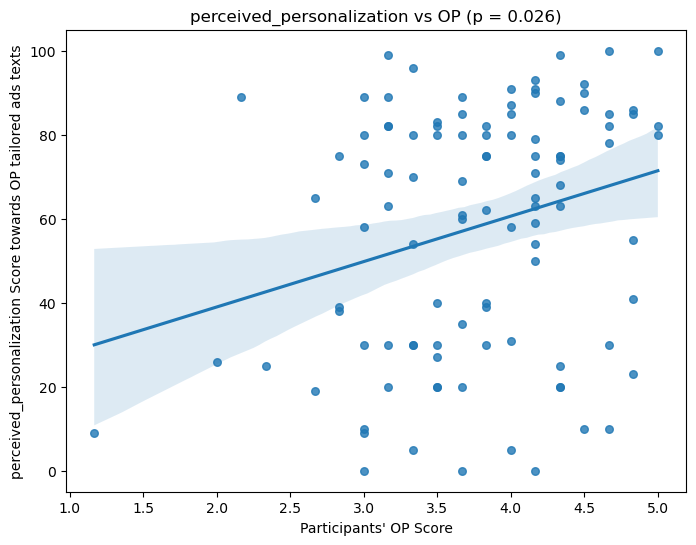


--------------------------------------------------
perceived_personalization CO (Full Model)
--------------------------------------------------
                                 OLS Regression Results                                 
Dep. Variable:     perceived_personalization_CO   R-squared:                       0.221
Model:                                      OLS   Adj. R-squared:                  0.057
Method:                           Least Squares   F-statistic:                     1.343
Date:                          Fri, 26 Jul 2024   Prob (F-statistic):              0.183
Time:                                  16:55:21   Log-Likelihood:                -478.02
No. Observations:                           104   AIC:                             994.0
Df Residuals:                                85   BIC:                             1044.
Df Model:                                    18                                         
Covariance Type:                      nonrobust       

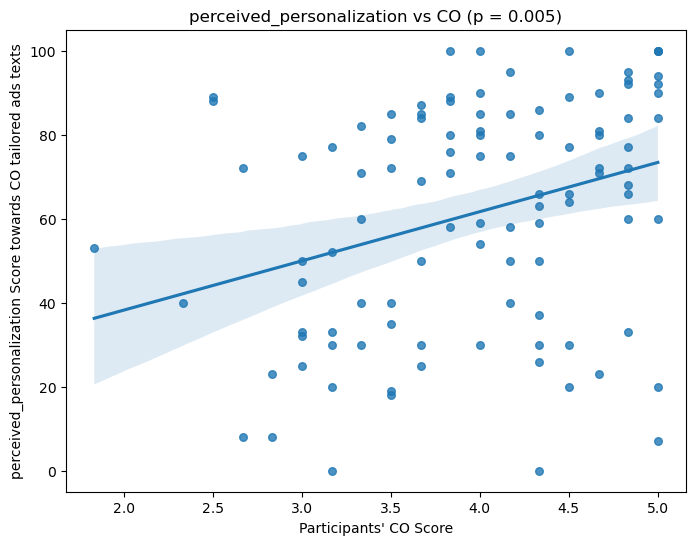


--------------------------------------------------
perceived_personalization EX (Full Model)
--------------------------------------------------
                                 OLS Regression Results                                 
Dep. Variable:     perceived_personalization_EX   R-squared:                       0.306
Model:                                      OLS   Adj. R-squared:                  0.159
Method:                           Least Squares   F-statistic:                     2.079
Date:                          Fri, 26 Jul 2024   Prob (F-statistic):             0.0134
Time:                                  16:55:21   Log-Likelihood:                -489.55
No. Observations:                           104   AIC:                             1017.
Df Residuals:                                85   BIC:                             1067.
Df Model:                                    18                                         
Covariance Type:                      nonrobust       

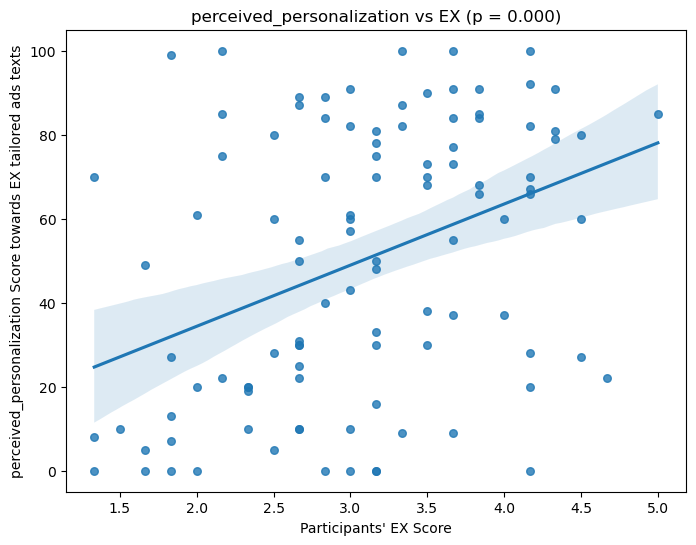


--------------------------------------------------
perceived_personalization AG (Full Model)
--------------------------------------------------
                                 OLS Regression Results                                 
Dep. Variable:     perceived_personalization_AG   R-squared:                       0.179
Model:                                      OLS   Adj. R-squared:                  0.005
Method:                           Least Squares   F-statistic:                     1.030
Date:                          Fri, 26 Jul 2024   Prob (F-statistic):              0.436
Time:                                  16:55:21   Log-Likelihood:                -482.78
No. Observations:                           104   AIC:                             1004.
Df Residuals:                                85   BIC:                             1054.
Df Model:                                    18                                         
Covariance Type:                      nonrobust       

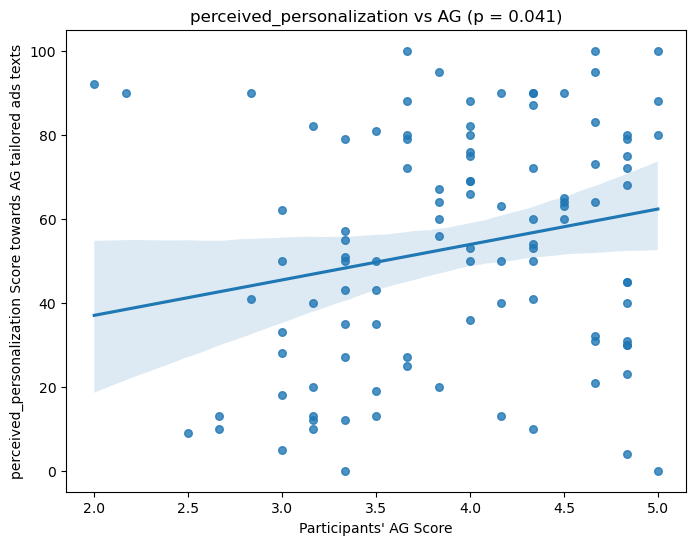


--------------------------------------------------
perceived_credibility OP (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_OP   R-squared:                       0.136
Model:                                  OLS   Adj. R-squared:                 -0.047
Method:                       Least Squares   F-statistic:                    0.7457
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):              0.755
Time:                              16:55:22   Log-Likelihood:                -470.98
No. Observations:                       104   AIC:                             980.0
Df Residuals:                            85   BIC:                             1030.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

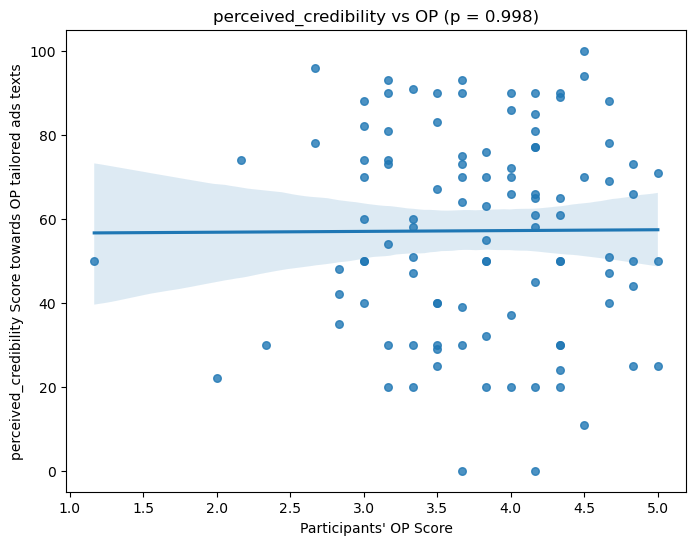


--------------------------------------------------
perceived_credibility CO (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_CO   R-squared:                       0.222
Model:                                  OLS   Adj. R-squared:                  0.057
Method:                       Least Squares   F-statistic:                     1.348
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):              0.180
Time:                              16:55:22   Log-Likelihood:                -471.75
No. Observations:                       104   AIC:                             981.5
Df Residuals:                            85   BIC:                             1032.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

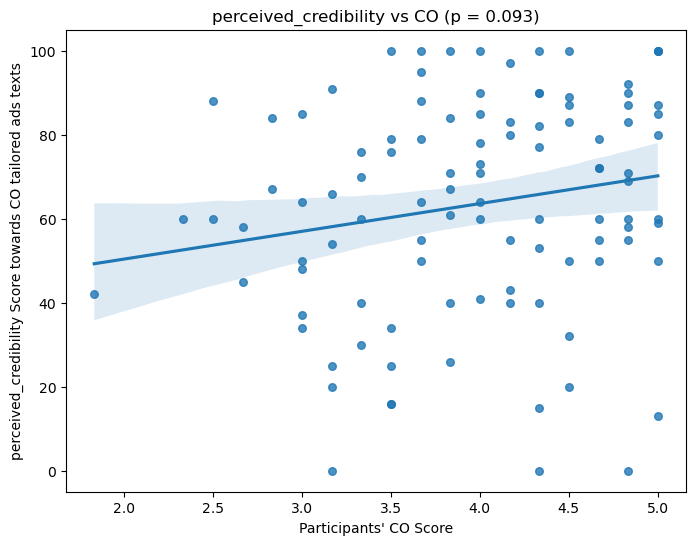


--------------------------------------------------
perceived_credibility EX (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_EX   R-squared:                       0.216
Model:                                  OLS   Adj. R-squared:                  0.050
Method:                       Least Squares   F-statistic:                     1.301
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):              0.208
Time:                              16:55:23   Log-Likelihood:                -476.95
No. Observations:                       104   AIC:                             991.9
Df Residuals:                            85   BIC:                             1042.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

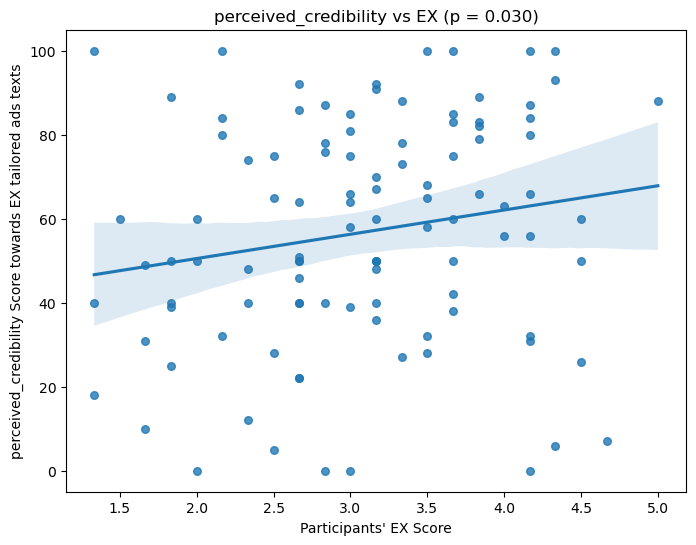


--------------------------------------------------
perceived_credibility AG (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_AG   R-squared:                       0.165
Model:                                  OLS   Adj. R-squared:                 -0.012
Method:                       Least Squares   F-statistic:                    0.9341
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):              0.541
Time:                              16:55:23   Log-Likelihood:                -469.14
No. Observations:                       104   AIC:                             976.3
Df Residuals:                            85   BIC:                             1027.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

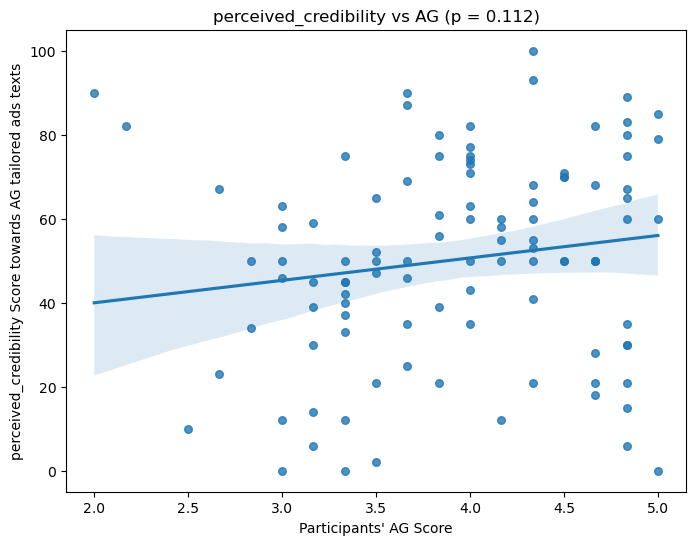


--------------------------------------------------
overall_attitude OP (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_OP   R-squared:                       0.199
Model:                             OLS   Adj. R-squared:                  0.030
Method:                  Least Squares   F-statistic:                     1.174
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):              0.301
Time:                         16:55:23   Log-Likelihood:                -483.75
No. Observations:                  104   AIC:                             1005.
Df Residuals:                       85   BIC:                             1056.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|   

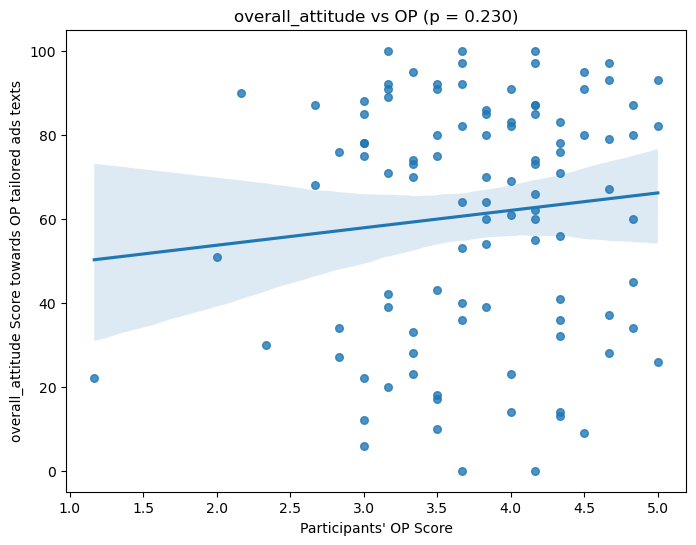


--------------------------------------------------
overall_attitude CO (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_CO   R-squared:                       0.189
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     1.101
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):              0.365
Time:                         16:55:24   Log-Likelihood:                -482.55
No. Observations:                  104   AIC:                             1003.
Df Residuals:                       85   BIC:                             1053.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|   

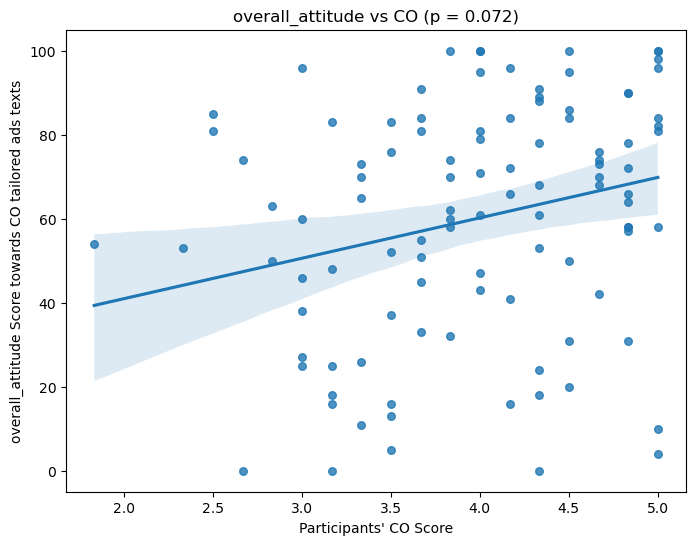


--------------------------------------------------
overall_attitude EX (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_EX   R-squared:                       0.265
Model:                             OLS   Adj. R-squared:                  0.110
Method:                  Least Squares   F-statistic:                     1.705
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):             0.0539
Time:                         16:55:24   Log-Likelihood:                -486.23
No. Observations:                  104   AIC:                             1010.
Df Residuals:                       85   BIC:                             1061.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|   

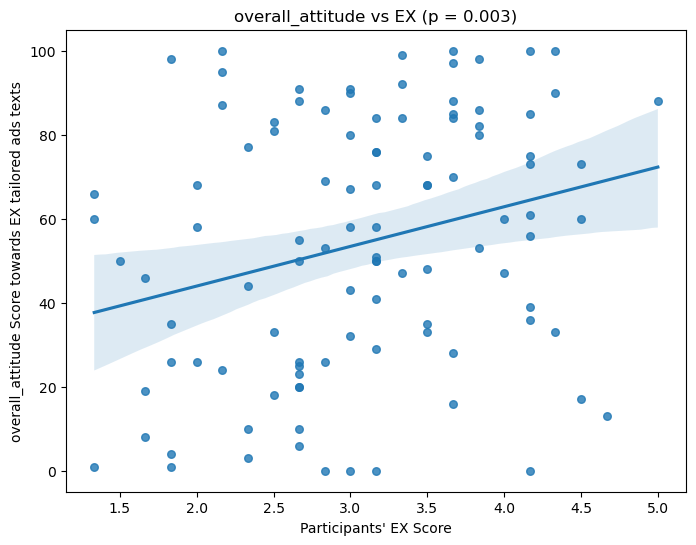


--------------------------------------------------
overall_attitude AG (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_AG   R-squared:                       0.146
Model:                             OLS   Adj. R-squared:                 -0.035
Method:                  Least Squares   F-statistic:                    0.8063
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):              0.688
Time:                         16:55:25   Log-Likelihood:                -482.95
No. Observations:                  104   AIC:                             1004.
Df Residuals:                       85   BIC:                             1054.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|   


--------------------------------------------------
ads_engagement OP (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_OP   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.9251
Date:                Fri, 26 Jul 2024   Prob (F-statistic):              0.551
Time:                        16:55:25   Log-Likelihood:                -500.68
No. Observations:                 104   AIC:                             1039.
Df Residuals:                      85   BIC:                             1090.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025   


--------------------------------------------------
ads_engagement CO (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_CO   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.334
Date:                Fri, 26 Jul 2024   Prob (F-statistic):              0.188
Time:                        16:55:25   Log-Likelihood:                -493.97
No. Observations:                 104   AIC:                             1026.
Df Residuals:                      85   BIC:                             1076.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025   

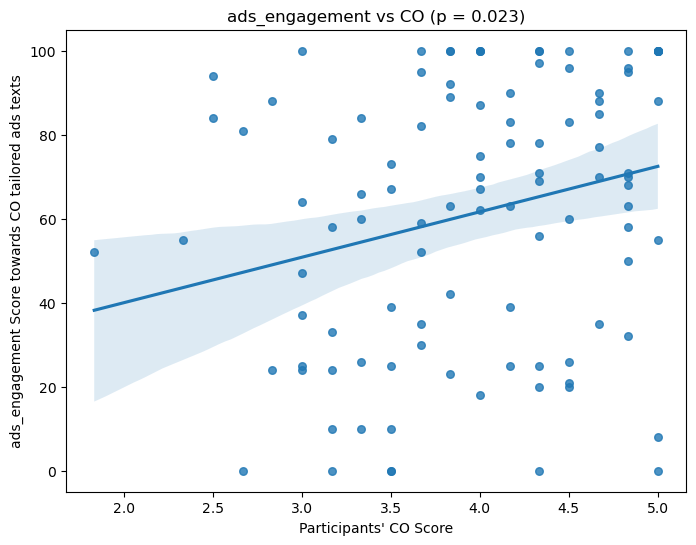


--------------------------------------------------
ads_engagement EX (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_EX   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1.935
Date:                Fri, 26 Jul 2024   Prob (F-statistic):             0.0231
Time:                        16:55:26   Log-Likelihood:                -496.35
No. Observations:                 104   AIC:                             1031.
Df Residuals:                      85   BIC:                             1081.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025   

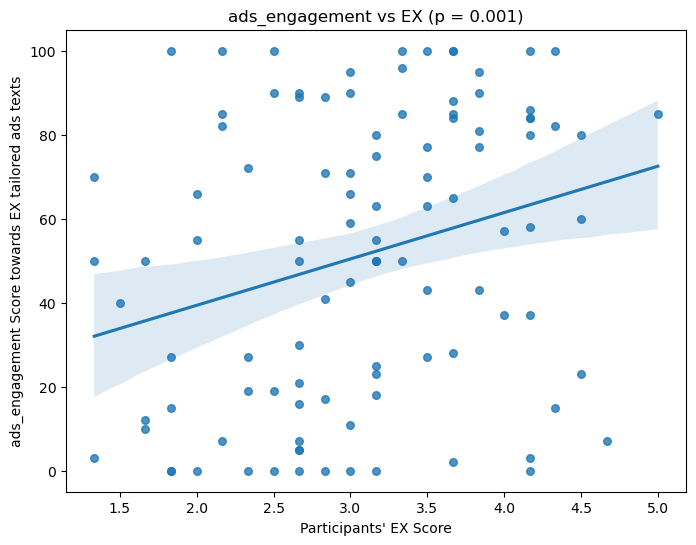


--------------------------------------------------
ads_engagement AG (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_AG   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.7574
Date:                Fri, 26 Jul 2024   Prob (F-statistic):              0.742
Time:                        16:55:26   Log-Likelihood:                -496.48
No. Observations:                 104   AIC:                             1031.
Df Residuals:                      85   BIC:                             1081.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025   

In [91]:
Study2a_1_results_list = []
Study2a_1_plot_list = []

for construct in ads_constructs:
    for big5_type in big5_types:
        col = construct + '_' + big5_type
        y = ads_scores_df[col]
        
        # Fit the model with all data points
        model_full = sm.OLS(y, X)
        results_full = model_full.fit()
        
        print(f"\n{'-'*50}\n{construct} {big5_type} (Full Model)\n{'-'*50}")
        print(results_full.summary())
        
        # Check regression assumptions and get influential points
        influential = check_regression_assumptions(results_full, X, y)
        
        # Fit the model excluding influential points
        if sum(influential) > 0:
            X_filtered = X[~influential]
            y_filtered = y[~influential]
            
            model_filtered = sm.OLS(y_filtered, X_filtered)
            results_filtered = model_filtered.fit()
            
            print(f"\n{'-'*50}\n{construct} {big5_type} (Excluding Influential Points)\n{'-'*50}")
            print(results_filtered.summary())
            
            # Check assumptions for the filtered model
            print("\nAssumption checks for the filtered model:")
            check_regression_assumptions(results_filtered, X_filtered, y_filtered)
            
            # Append both results
            Study2a_1_results_list.append((results_full, results_filtered))
        else:
            Study2a_1_results_list.append((results_full, None))
        
        # Plotting (using full dataset for visualization)
        col_flag = big5_lookup[big5_type]
        p_value = results_full.pvalues[col_flag]
        plt.figure(figsize=(8, 6))
        sns.regplot(x=ads_big5_df_final[col_flag], y=y, ci=95, scatter_kws={"s": 30})
        plt.xlabel(f"Participants' {big5_type} Score")
        plt.ylabel(f"{construct} Score towards {big5_type} tailored ads texts")
        plt.title(f"{construct} vs {big5_type} (p = {p_value:.3f})")

        # Save or show the plot
        Study2a_1_plot_list.append(plt)
        plt.show()

#### Study2a.2

Study2a.2: [y] 'perceived_credibility' scores for each of 4 versions vs [X] 'perceived_personalization' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 

[perceived_credibility] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['perceived_credibility_OP'] vs ads_scores_df['perceived_personalization_OP'], ads_big5_df_final['Open_Mindedness'], controlling for socio economic
- ads_scores_df['perceived_credibility_CO'] vs ads_scores_df['perceived_personalization_CO'], ads_big5_df_final['Conscientiousness'], controlling for socio economic
- ads_scores_df['perceived_credibility_EX'] vs ads_scores_df['perceived_personalization_EX'], ads_big5_df_final['Extraversion'], controlling for socio economic
- ads_scores_df['perceived_credibility_AG'] vs ads_scores_df['perceived_personalization_AG'], ads_big5_df_final['Agreeableness'], controlling for socio economic

In [65]:
ads_constructs

['perceived_personalization',
 'perceived_credibility',
 'overall_attitude',
 'ads_engagement']

In [66]:
ads_big5_df_final.iloc[:,1:]

age  income  gender_2  education_3  education_4  education_5  \
0     34       1         0            0            1            0   
1     36       7         0            0            0            1   
2     48      11         1            0            0            1   
3     41       5         1            0            1            0   
4     48       9         1            0            0            0   
..   ...     ...       ...          ...          ...          ...   
99    27       1         1            0            1            0   
100   30       5         1            0            0            0   
101   55      11         1            0            0            1   
102   43      12         0            0            0            1   
103   43       8         1            0            0            1   

     education_6  race_2  race_99  employment_5  employment_6  employment_7  \
0              0       1        0             1             0             0   
1              0       0        0             0             0             1   
2              0       0        0             0             1             0   
3              0       0        0             1             0             0   
4              0       0        0             0             0             0   
..           ...     ...      ...           ...           ...           ...   
99             0       1        0             0             0             0   
100            0       0        0             0             1             0   
101            0       1        0             0             0             0   
102            0       1        0             0             0             1   
103            0       1        0             0             0             1   

     employment_99  Extraversion  Agreeableness  Conscientiousness  \
0                0      3.666667       4.000000           3.500000   
1                0      3.833333       3.166667           4.166667   
2                0      4.166667       3.166667           4.666667   
3                0      3.166667       3.333333           3.000000   
4                0      3.000000       4.333333           3.500000   
..             ...           ...            ...                ...   
99               0      3.333333       3.000000           3.166667   
100              0      3.500000       4.833333           4.333333   
101              1      3.666667       4.833333           4.333333   
102              0      3.833333       4.000000           4.666667   
103              0      4.500000       4.666667           5.000000   

     Neuroticism  Open_Mindedness  
0       2.166667         3.000000  
1       1.833333         4.166667  
2       1.833333         3.166667  
3       4.000000         4.166667  
4       2.666667         4.166667  
..           ...              ...  
99      3.666667         4.166667  
100     1.000000         3.000000  
101     1.166667         4.666667  
102     1.666667         4.000000  
103     1.333333         3.166667  

[104 rows x 18 columns]

In [67]:
big5_types

['OP', 'CO', 'EX', 'AG']

In [107]:
# Definition of X
# 1. big 5 trait scores + socio economics = ads_big5_df_final.iloc[:,1:]
# 2. perceived_personalization for each of 4 personality traits
# 3. 

# Definition of y
# perceived_credibility for each of 4 personality traits

X = ads_big5_df_final.iloc[:,1:]
X_target_constructs = ['perceived_personalization']
y_target_constract = 'perceived_credibility'

for construct in X_target_constructs:
    for big5_type in big5_types:
        col_name = construct + '_' + big5_type
        
        X[col_name] = ads_scores_df[col_name]

continuous_columns = [col for col in X.columns if col not in ['race', 'employment', 'gender', 'education']]
dummy_columns = [col for col in X.columns if col in ['race', 'employment', 'gender', 'education']]

scaler = StandardScaler()
X_continuous_scaled = pd.DataFrame(scaler.fit_transform(X[continuous_columns]), columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = X_scaled



--------------------------------------------------
perceived_credibility OP (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_OP   R-squared:                       0.579
Model:                                  OLS   Adj. R-squared:                  0.465
Method:                       Least Squares   F-statistic:                     5.063
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           3.56e-08
Time:                              17:52:45   Log-Likelihood:                -433.62
No. Observations:                       104   AIC:                             913.2
Df Residuals:                            81   BIC:                             974.1
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

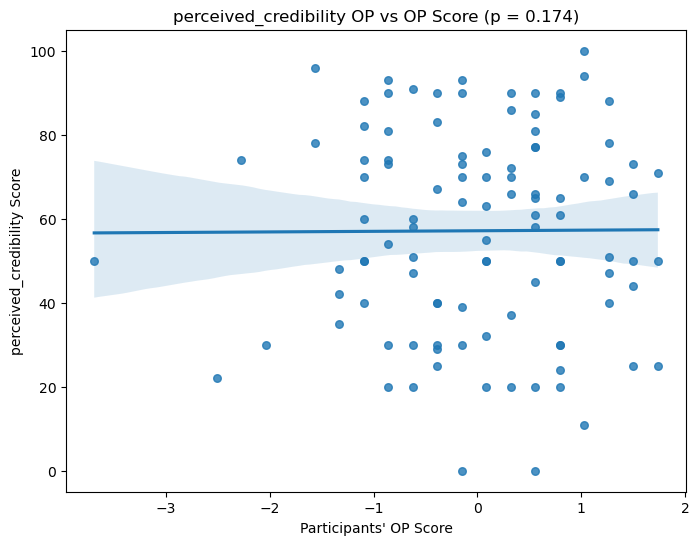

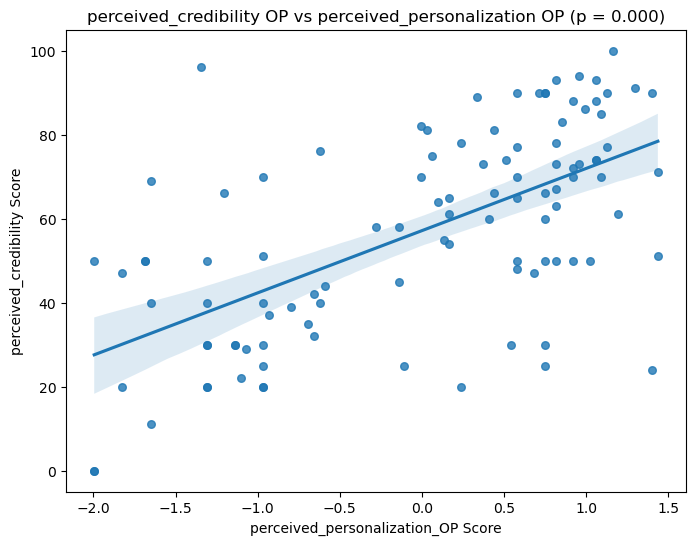


--------------------------------------------------
perceived_credibility CO (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_CO   R-squared:                       0.667
Model:                                  OLS   Adj. R-squared:                  0.577
Method:                       Least Squares   F-statistic:                     7.373
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           1.04e-11
Time:                              17:52:46   Log-Likelihood:                -427.63
No. Observations:                       104   AIC:                             901.3
Df Residuals:                            81   BIC:                             962.1
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

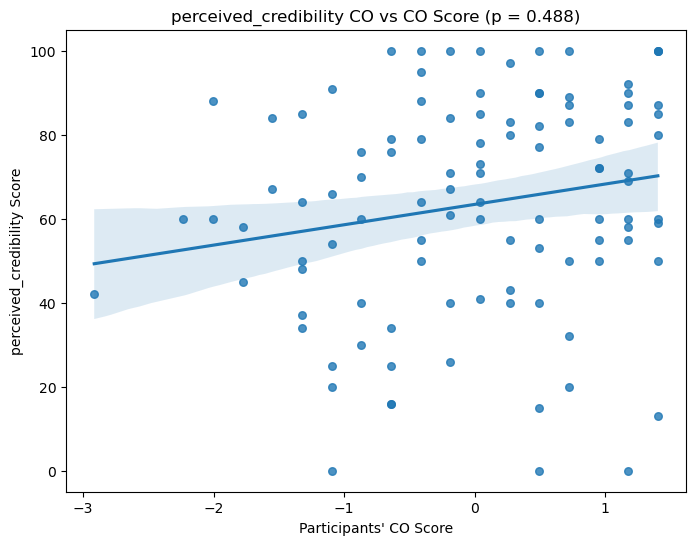

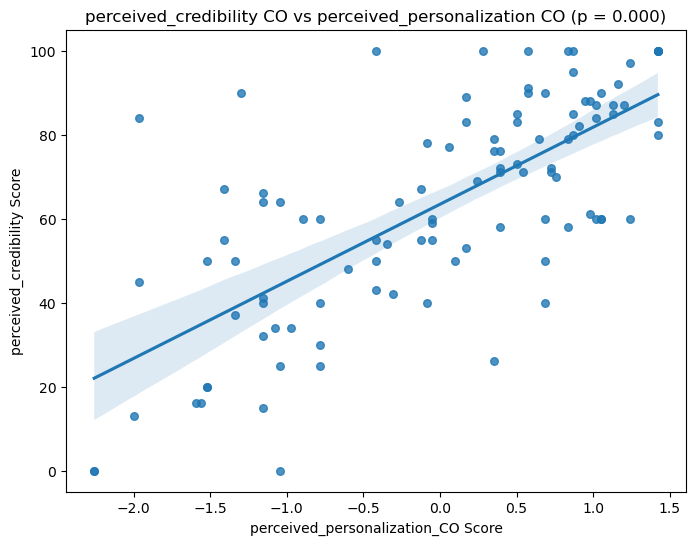


--------------------------------------------------
perceived_credibility EX (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_EX   R-squared:                       0.617
Model:                                  OLS   Adj. R-squared:                  0.513
Method:                       Least Squares   F-statistic:                     5.930
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           1.42e-09
Time:                              17:52:47   Log-Likelihood:                -439.70
No. Observations:                       104   AIC:                             925.4
Df Residuals:                            81   BIC:                             986.2
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

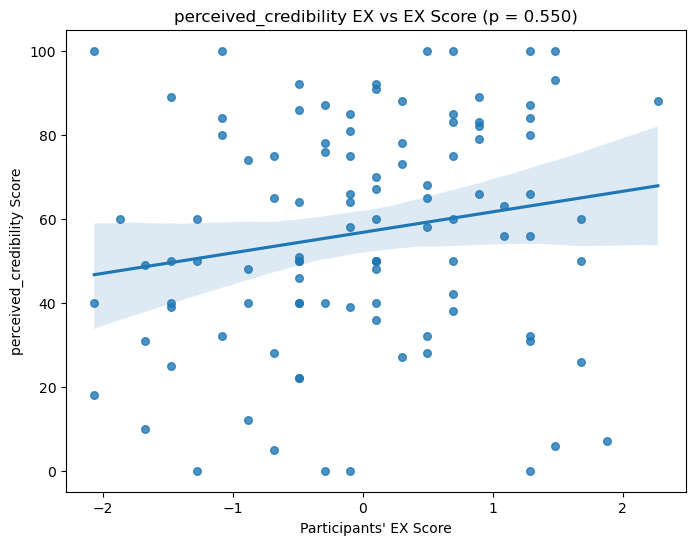

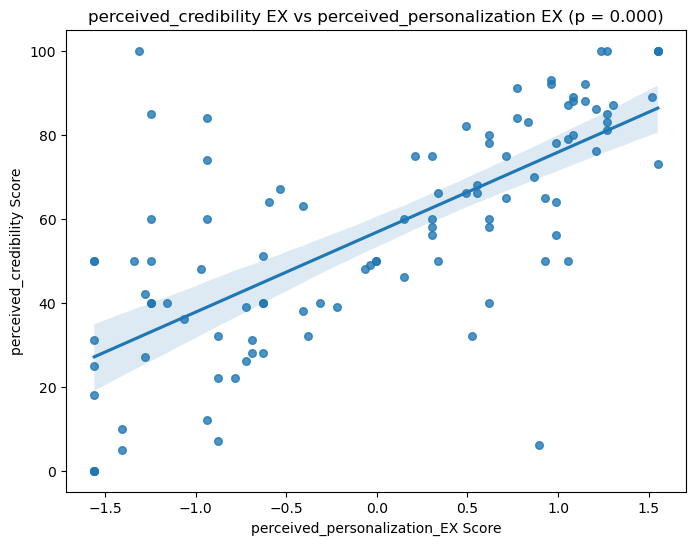


--------------------------------------------------
perceived_credibility AG (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     perceived_credibility_AG   R-squared:                       0.638
Model:                                  OLS   Adj. R-squared:                  0.539
Method:                       Least Squares   F-statistic:                     6.476
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           2.08e-10
Time:                              17:52:48   Log-Likelihood:                -425.75
No. Observations:                       104   AIC:                             897.5
Df Residuals:                            81   BIC:                             958.3
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

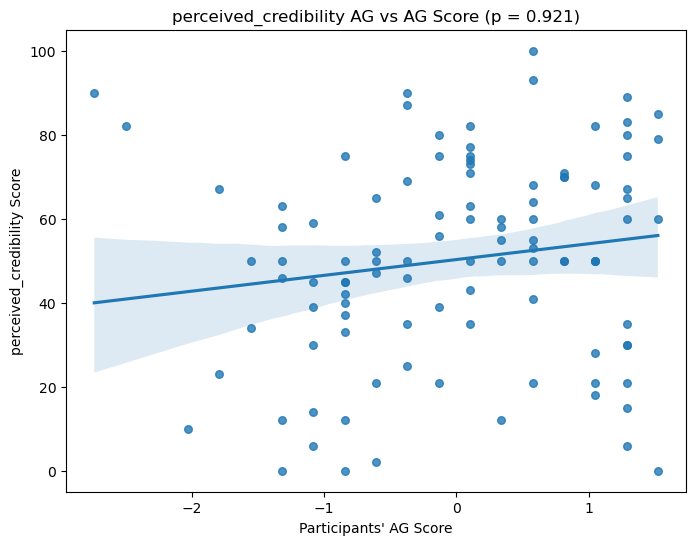

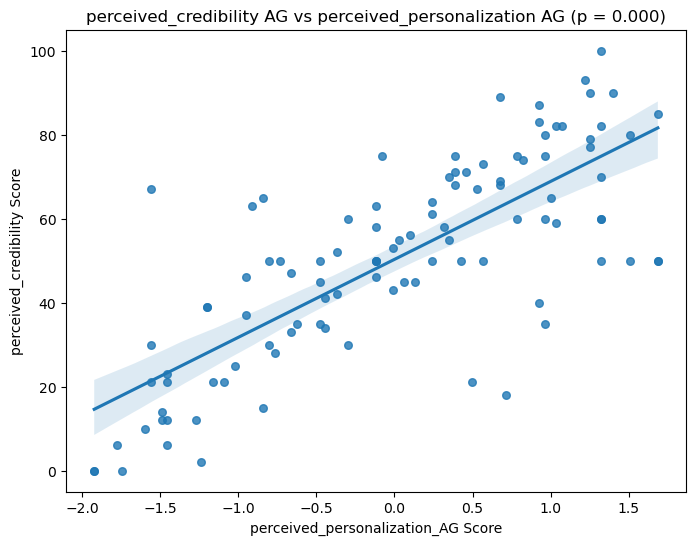

In [108]:
Study2a_2_results_list = []
Study2a_2_plot_list = []

fit_OLS_and_draw_plot(ads_scores_df, 
                      Study2a_2_results_list, 
                      Study2a_2_plot_list,
                      exclude_influential=True)

In [117]:
# Use the function
save_all_regression_results(Study2a_2_results_list, 
                            'perceived_personalization',
                            'presentation_for_paper/tmp/study2a_2_results.csv')

Results saved to study2a_2_results.csv


#### Study2a.3

Study2a.3. [y] 'overall_attitude' scores for each of 4 versions vs [X] 'perceived_personalization' scores for each of 4 versions & & matched big5 scores for each of 4 versions, controlling for socioeconomic.  Produce two versions to test moderator effect of  'perceived_credibility' scores for each of 4 versions.

[overall_attitude: Without Interaction] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['overall_attitude_OP'] vs ads_scores_df['perceived_personalization_OP'], ads_big5_df_final['Open_Mindedness'], ads_scores_df['perceived_credibility_OP'], controlling for socio economic
- ads_scores_df['overall_attitude_CO'] vs ads_scores_df['perceived_personalization_CO'], ads_big5_df_final['Conscientiousness'], ads_scores_df['perceived_credibility_CO'], controlling for socio economic
- ads_scores_df['overall_attitude_EX'] vs ads_scores_df['perceived_personalization_EX'], ads_big5_df_final['Extraversion'], ads_scores_df['perceived_credibility_EX'], controlling for socio economic
- ads_scores_df['overall_attitude_AG'] vs ads_scores_df['perceived_personalization_AG'], ads_big5_df_final['Agreeableness'], ads_scores_df['perceived_credibility_AG'], controlling for socio economic

[Introduce interaction column] 
- ads_scores_df['interaction_perceived_personalization_perceived_credibility_OP'] = ads_scores_df['perceived_personalization_OP'] * ads_scores_df['perceived_credibility_OP']
- ads_scores_df['interaction_perceived_personalization_perceived_credibility_CO'] = ads_scores_df['perceived_personalization_CO'] * ads_scores_df['perceived_credibility_CO']
- ads_scores_df['interaction_perceived_personalization_perceived_credibility_EX'] = ads_scores_df['perceived_personalization_EX'] * ads_scores_df['perceived_credibility_EX']
- ads_scores_df['interaction_perceived_personalization_perceived_credibility_AG'] = ads_scores_df['perceived_personalization_AG'] * ads_scores_df['perceived_credibility_AG']

[overall_attitude: With Interaction] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['overall_attitude_OP'] vs ads_scores_df['perceived_personalization_OP'], ads_big5_df_final['Open_Mindedness'], ads_scores_df['perceived_credibility_OP'], ads_scores_df['interaction_perceived_personalization_perceived_credibility_OP'], controlling for socio economic
- ads_scores_df['overall_attitude_CO'] vs ads_scores_df['perceived_personalization_CO'], ads_big5_df_final['Conscientiousness'], ads_scores_df['perceived_credibility_CO'], ads_scores_df['interaction_perceived_personalization_perceived_credibility_CO'], controlling for socio economic
- ads_scores_df['overall_attitude_EX'] vs ads_scores_df['perceived_personalization_EX'], ads_big5_df_final['Extraversion'], ads_scores_df['perceived_credibility_EX'], ads_scores_df['interaction_perceived_personalization_perceived_credibility_EX'], controlling for socio economic
- ads_scores_df['overall_attitude_AG'] vs ads_scores_df['perceived_personalization_AG'], ads_big5_df_final['Agreeableness'], ads_scores_df['perceived_credibility_AG'], ads_scores_df['interaction_perceived_personalization_perceived_credibility_AG''], controlling for socio economic

[Calculating the impact of moderator]
- sm.stats.anova_lm(Without Interaction model OP, With Interaction model OP)
- sm.stats.anova_lm(Without Interaction model CO, With Interaction model CO)
- sm.stats.anova_lm(Without Interaction model EX, With Interaction model EX)
- sm.stats.anova_lm(Without Interaction model AG, With Interaction model AG)

[overall_attitude: Without Interaction] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['overall_attitude_OP'] vs ads_scores_df['perceived_personalization_OP'], ads_big5_df_final['Open_Mindedness'], ads_scores_df['perceived_credibility_OP'], controlling for socio economic
- ads_scores_df['overall_attitude_CO'] vs ads_scores_df['perceived_personalization_CO'], ads_big5_df_final['Conscientiousness'], ads_scores_df['perceived_credibility_CO'], controlling for socio economic
- ads_scores_df['overall_attitude_EX'] vs ads_scores_df['perceived_personalization_EX'], ads_big5_df_final['Extraversion'], ads_scores_df['perceived_credibility_EX'], controlling for socio economic
- ads_scores_df['overall_attitude_AG'] vs ads_scores_df['perceived_personalization_AG'], ads_big5_df_final['Agreeableness'], ads_scores_df['perceived_credibility_AG'], controlling for socio economic

In [131]:
# Definition of X
# 1. big 5 trait scores + socio economics = ads_big5_df_final.iloc[:,1:]
# 2. perceived_personalization for each of 4 personality traits
# 3. perceived_credibiliy for each of 4 personality traits

# Definition of y
# ovearall_attitude for each of 4 personality traits

# Data preparation
X = ads_big5_df_final.iloc[:,1:]
X_target_constructs = ['perceived_personalization', 'perceived_credibility']
y_target_constract = 'overall_attitude'

for construct in X_target_constructs:
    for big5_type in big5_types:
        col_name = construct + '_' + big5_type
        X[col_name] = ads_scores_df[col_name]

continuous_columns = [col for col in X.columns if col not in ['race', 'employment', 'gender', 'education']]
dummy_columns = [col for col in X.columns if col in ['race', 'employment', 'gender', 'education']]

scaler = StandardScaler()
X_continuous_scaled = pd.DataFrame(scaler.fit_transform(X[continuous_columns]), columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = X_scaled


--------------------------------------------------
overall_attitude OP (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_OP   R-squared:                       0.839
Model:                             OLS   Adj. R-squared:                  0.785
Method:                  Least Squares   F-statistic:                     15.48
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):           4.74e-21
Time:                         18:22:06   Log-Likelihood:                -400.19
No. Observations:                  104   AIC:                             854.4
Df Residuals:                       77   BIC:                             925.8
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t   

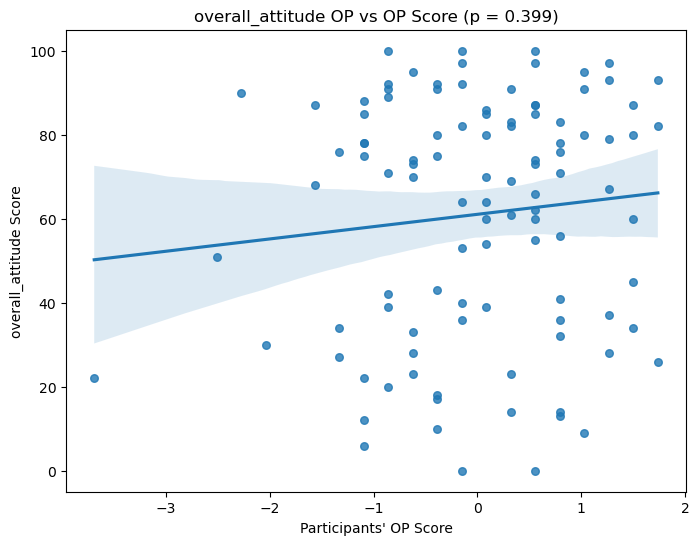

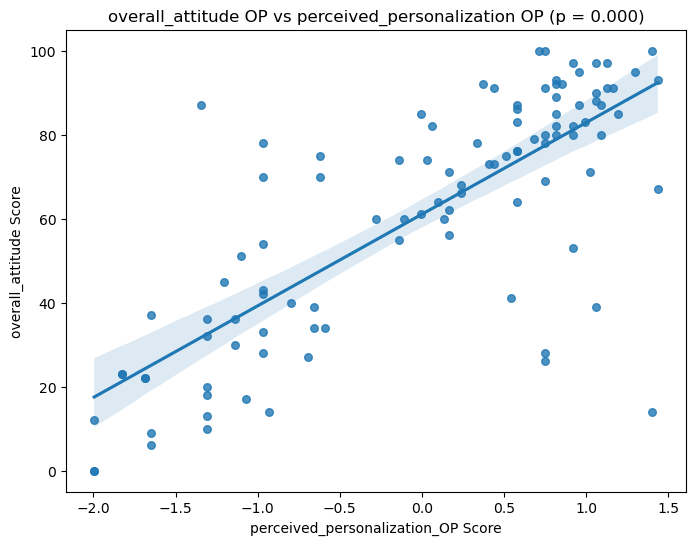

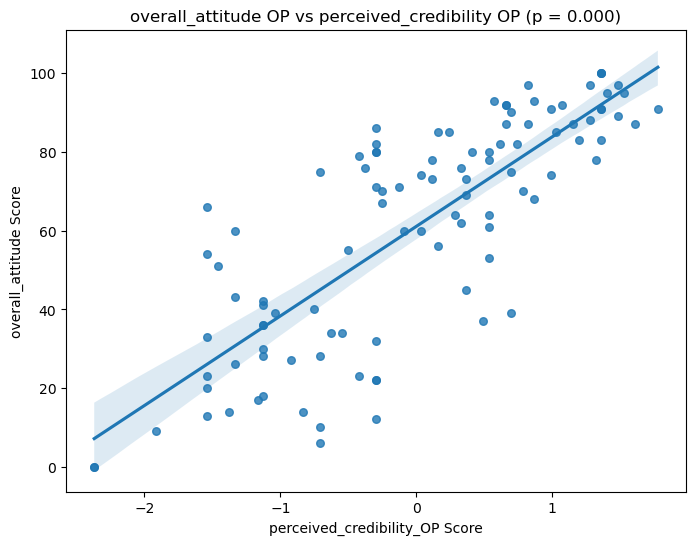


--------------------------------------------------
overall_attitude CO (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_CO   R-squared:                       0.872
Model:                             OLS   Adj. R-squared:                  0.829
Method:                  Least Squares   F-statistic:                     20.25
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):           1.05e-24
Time:                         18:22:07   Log-Likelihood:                -386.38
No. Observations:                  104   AIC:                             826.8
Df Residuals:                       77   BIC:                             898.2
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t   

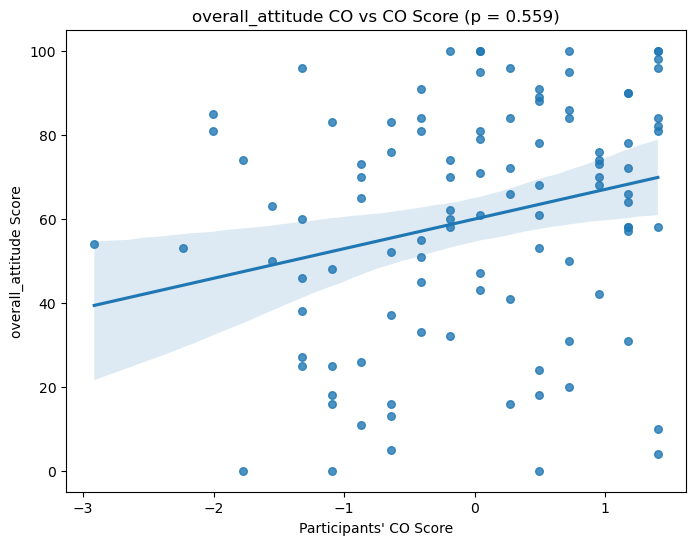

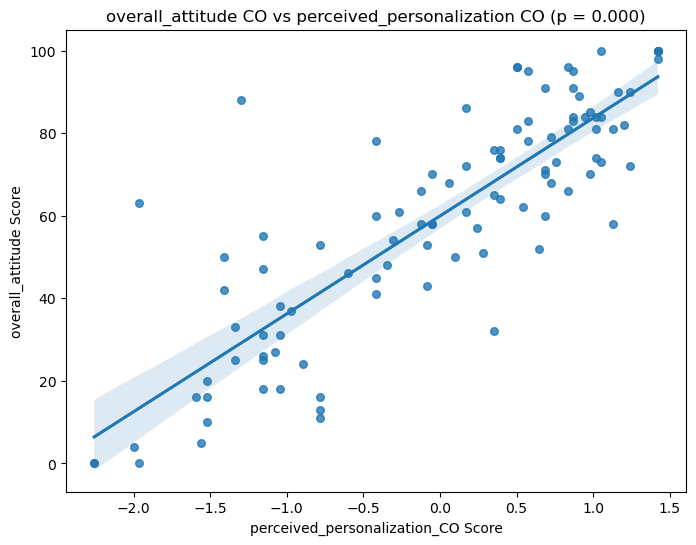

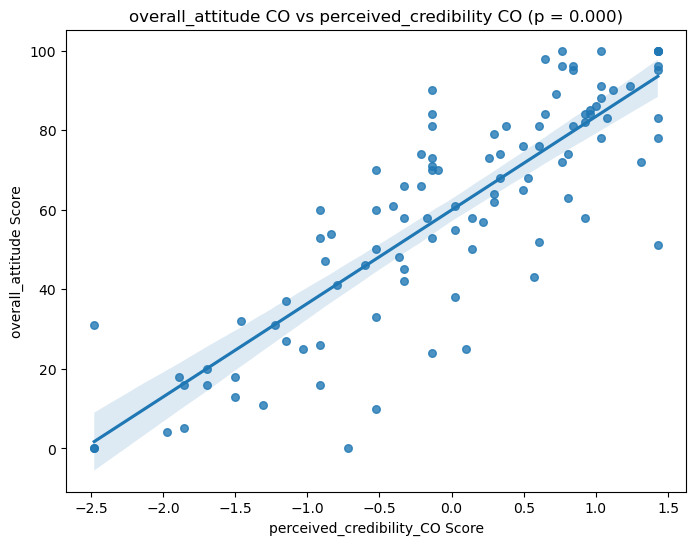


--------------------------------------------------
overall_attitude EX (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_EX   R-squared:                       0.866
Model:                             OLS   Adj. R-squared:                  0.820
Method:                  Least Squares   F-statistic:                     19.08
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):           7.13e-24
Time:                         18:22:08   Log-Likelihood:                -397.90
No. Observations:                  104   AIC:                             849.8
Df Residuals:                       77   BIC:                             921.2
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t   

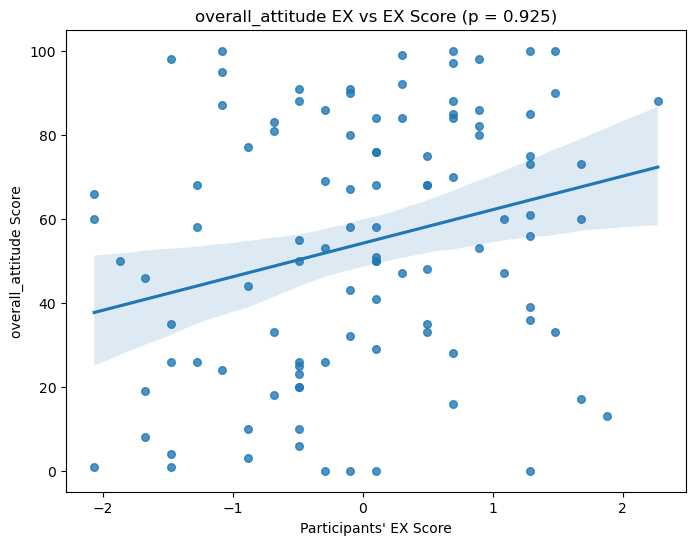

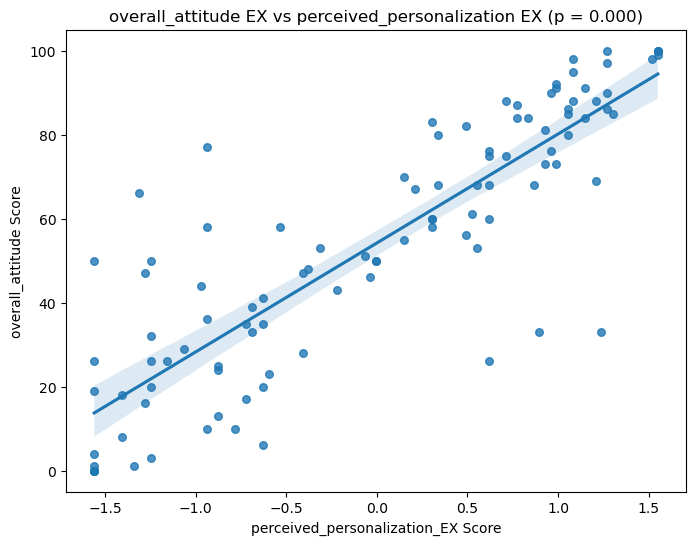

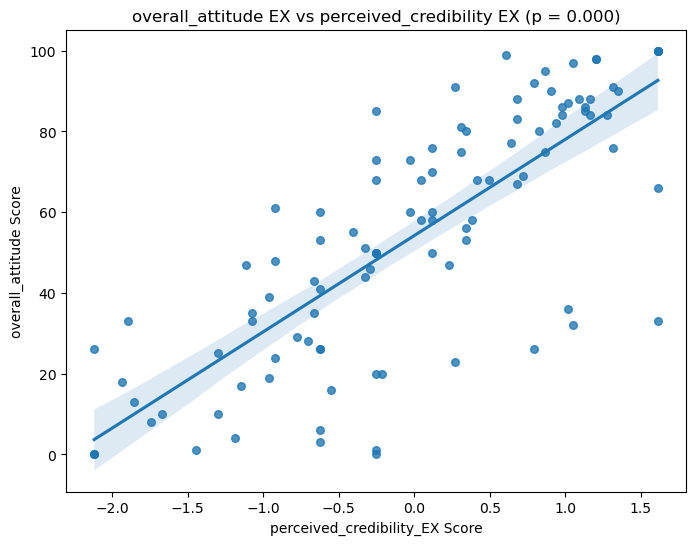


--------------------------------------------------
overall_attitude AG (Full Model)
--------------------------------------------------
                             OLS Regression Results                            
Dep. Variable:     overall_attitude_AG   R-squared:                       0.899
Model:                             OLS   Adj. R-squared:                  0.865
Method:                  Least Squares   F-statistic:                     26.30
Date:                 Fri, 26 Jul 2024   Prob (F-statistic):           2.01e-28
Time:                         18:22:09   Log-Likelihood:                -372.04
No. Observations:                  104   AIC:                             798.1
Df Residuals:                       77   BIC:                             869.5
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t   

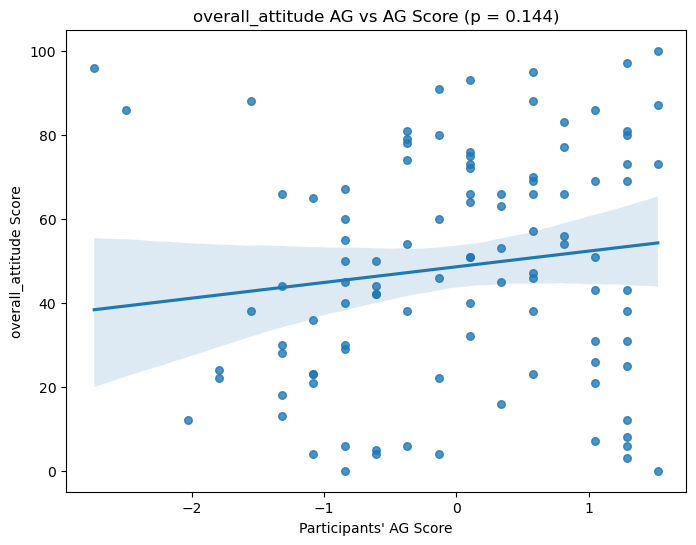

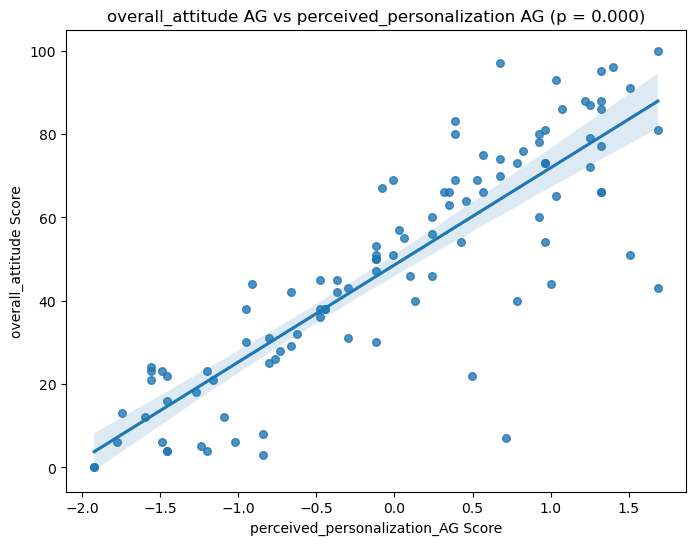

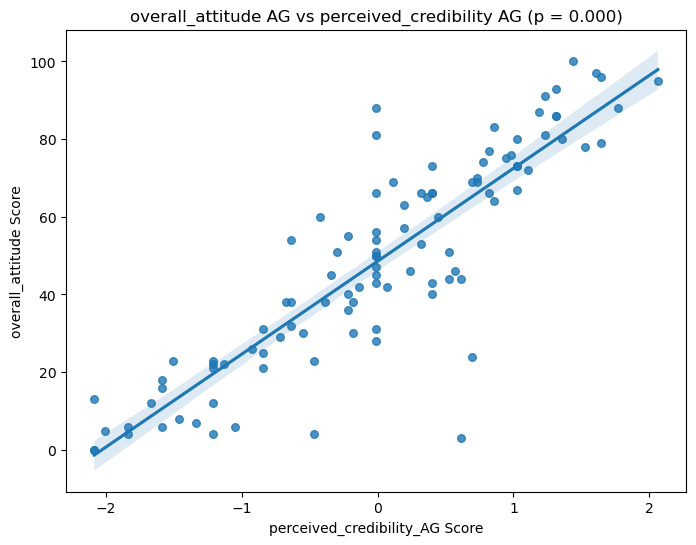

In [132]:
Study2a_3_results_list = []
Study2a_3_plot_list = []

fit_OLS_and_draw_plot(ads_scores_df, 
                      Study2a_3_results_list, Study2a_3_plot_list)

In [139]:
# Use the function
save_all_regression_results(Study2a_3_results_list,
                            'perceived_personalization',
                            'presentation_for_paper/tmp/study2a_3_personalization_results.csv')

Results saved to presentation_for_paper/tmp/study2a_3_personalization_results.csv


In [140]:
# Use the function
save_all_regression_results(Study2a_3_results_list, 
                            'perceived_credibility',
                            'presentation_for_paper/tmp/study2a_3_credibility_results.csv')

Results saved to presentation_for_paper/tmp/study2a_3_credibility_results.csv


#### Study2a.4

Study2a.4. [y] 'ads_engagement' scores for each of 4 versions vs [X] 'overall_attitude' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 

[ads_engagement] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- ads_scores_df['ads_engagement_OP'] vs ads_scores_df['overall_attitude_OP'], ads_big5_df_final['Open_Mindedness'], controlling for socio economic
- ads_scores_df['ads_engagement_CO'] vs ads_scores_df['overall_attitude_CO'], ads_big5_df_final['Conscientiousness'], controlling for socio economic
- ads_scores_df['ads_engagement_EX'] vs ads_scores_df['overall_attitude_EX'], ads_big5_df_final['Extraversion'], controlling for socio economic
- ads_scores_df['ads_engagement_AG'] vs ads_scores_df['overall_attitude_AG'], ads_big5_df_final['Agreeableness'], controlling for socio economic

In [135]:
# Definition of X
# 1. big 5 trait scores + socio economics = ads_big5_df_final.iloc[:,1:]
# 2. overall_attitude for each of 4 personality traits
# 3. controlling: perceived_personalization
# 4. controlling: perceived_credibility

# Definition of y
# ads_engagement for each of 4 personality traits

X = ads_big5_df_final.iloc[:,1:]
X_target_constructs = ['perceived_personalization', 'perceived_credibility', 'overall_attitude']
y_target_constract = 'ads_engagement'

for construct in X_target_constructs:
    for big5_type in big5_types:
        col_name = construct + '_' + big5_type
        
        X[col_name] = ads_scores_df[col_name]

continuous_columns = []
dummy_columns = []

for col in X.columns:
    if 'race_' in col or 'employment_' in col or 'gender_' in col or 'education_' in col:
        dummy_columns.append(col)
    else:
        continuous_columns.append(col)

scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_columns])
X_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = sm.add_constant(X)


--------------------------------------------------
ads_engagement OP (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_OP   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     27.15
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           8.68e-29
Time:                        18:28:32   Log-Likelihood:                -380.09
No. Observations:                 104   AIC:                             822.2
Df Residuals:                      73   BIC:                             904.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|    

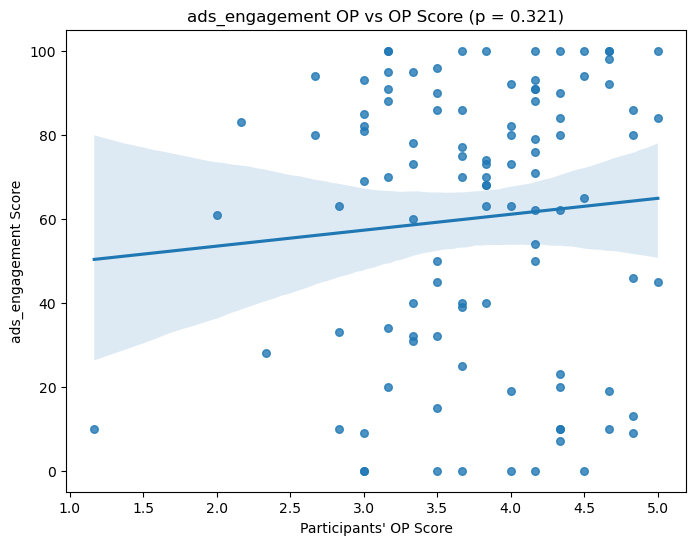


--------------------------------------------------
ads_engagement CO (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_CO   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     16.63
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           4.02e-22
Time:                        18:28:34   Log-Likelihood:                -399.86
No. Observations:                 104   AIC:                             861.7
Df Residuals:                      73   BIC:                             943.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|    

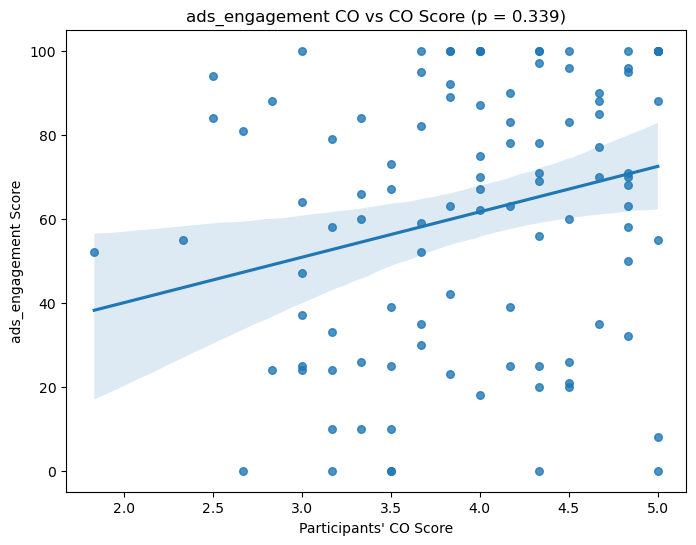

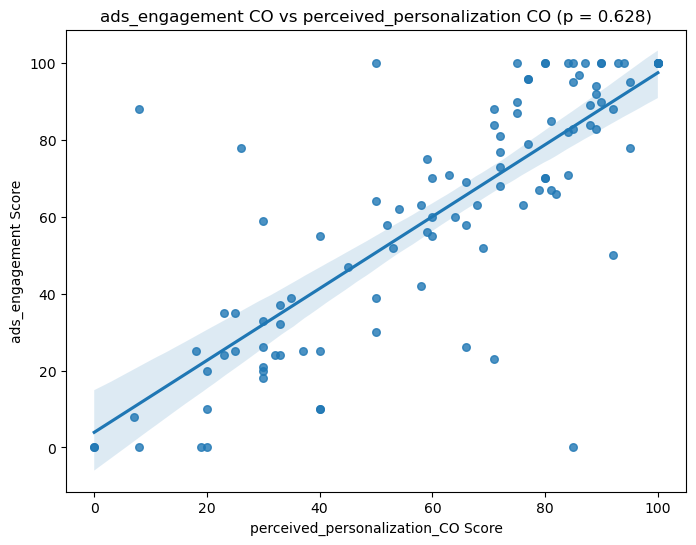

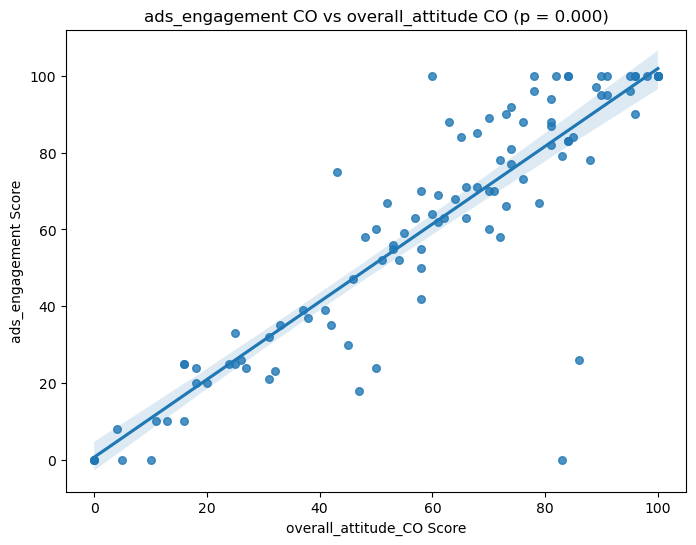


--------------------------------------------------
ads_engagement EX (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_EX   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     27.75
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           4.28e-29
Time:                        18:28:36   Log-Likelihood:                -383.28
No. Observations:                 104   AIC:                             828.6
Df Residuals:                      73   BIC:                             910.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|    

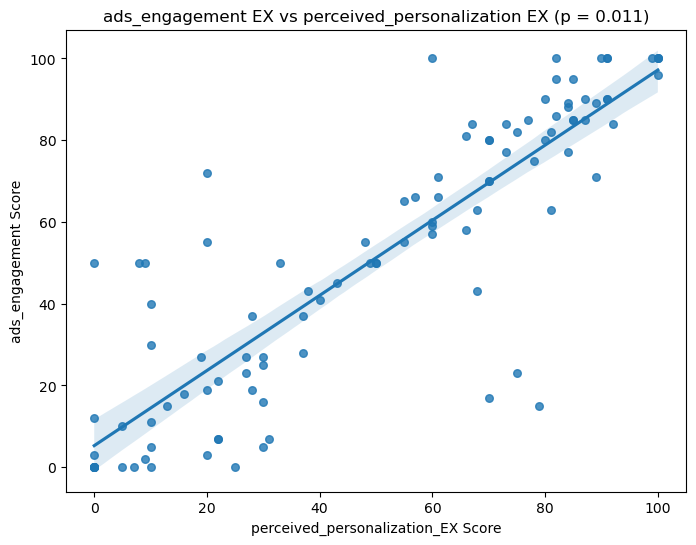

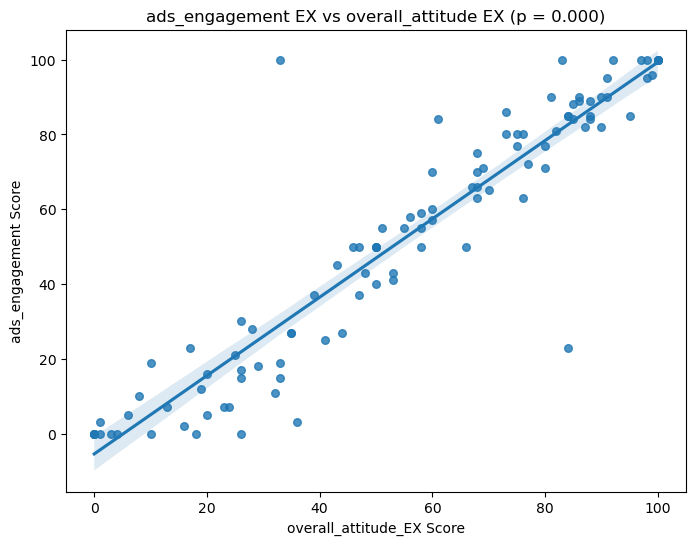


--------------------------------------------------
ads_engagement AG (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      ads_engagement_AG   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     56.15
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.32e-39
Time:                        18:28:37   Log-Likelihood:                -338.79
No. Observations:                 104   AIC:                             739.6
Df Residuals:                      73   BIC:                             821.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|    

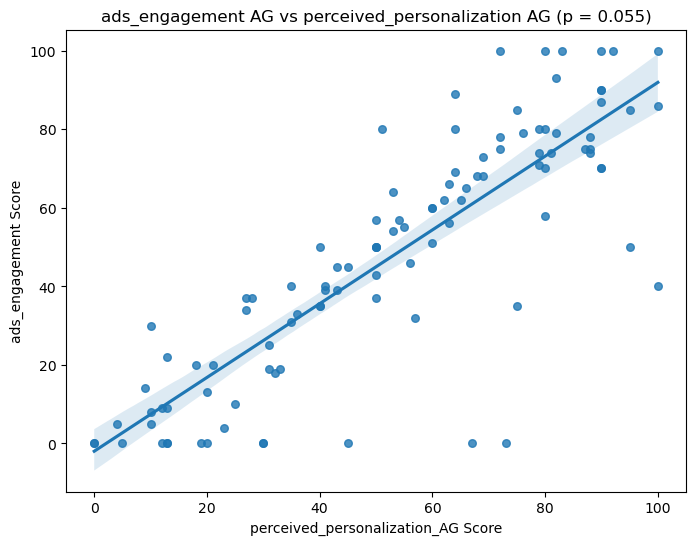

In [136]:
Study2a_4_results_list = []
Study2a_4_plot_list = []

fit_OLS_and_draw_plot(ads_scores_df, 
                      Study2a_4_results_list, Study2a_4_plot_list)

In [138]:
# Use the function
save_all_regression_results(Study2a_4_results_list, 
                            'overall_attitude',
                            'presentation_for_paper/tmp/study2a_4_results.csv')

Results saved to presentation_for_paper/tmp/study2a_4_results.csv


### Study 2b

![image.png](attachment:image.png)

Features to be regressed:
1. [y] each of the constructs(same questions for 4 different(big5) personalized contents) vs [X] big5 scores, controlling for socioeconomic 
2. [y] 'chat_overall_attitude' scores for each of 4 versions vs [X] 'chat_perceived_personalization' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 
3. [y] 'ads_engagement' scores for each of 4 versions vs [X] 'chat_overall_attitude' scores for each of 4 versions & matched big5 scores for each of 4 versions & 'chat_perceived_personalization' scores for each of 4 versions, controlling for socioeconomic 

#### Study 2b Preprocessing

In [142]:
# prep
socioecono_columns = ['gender',	'age',	'education', 'race', 'employment', 'income']                               # redefine to clarify
categorical_cols = ['gender', 'education', 'race', 'employment']                                                   # redefine categorical variables
chat_scores_result_cols = chat_scores.iloc[:,1:].columns.tolist()                                                  # responses to study2b
chat_constructs = ['chat_perceived_personalization', 'chat_overall_attitude', 'chat_engagement']                 # construct base names for chat

In [143]:
chat_scores_df = pd.merge(chat_scores, socioecono_df, on='ResponseId', how='left')
chat_scores_df

ResponseId  chat_perceived_personalization_OP  \
0    641c2b936dc70fab01d77dc6                                 86   
1    641357b26802e397b5627d5e                                 32   
2    66294a585f1cf3fdaeb80120                                 69   
3    661571d6cc16ee34676734df                                 59   
4    6629f95a14b6006e6a4b0aef                                 59   
..                        ...                                ...   
99   60a062ed4c4334abbbf32323                                 81   
100  5f3ac1732efa0a74f975b1a8                                 83   
101  6601b51675d287d6a62f11c4                                 91   
102  656f2e99bd2939f9b3f9d090                                 92   
103  6658822c0f5b1367a1585ee1                                 80   

     chat_trust_OP  chat_satisfaction_OP  chat_positive_emotion_OP  \
0               87                   100                       100   
1               27                    26                        31   
2               68                    89                        78   
3               56                    56                        56   
4               60                    58                        58   
..             ...                   ...                       ...   
99              86                    86                        89   
100             51                    70                        50   
101             94                    98                        98   
102             91                    93                        91   
103             60                    90                       100   

     chat_engagement_OP  chat_perceived_personalization_CO  chat_trust_CO  \
0                   100                                100             94   
1                    23                                 21             16   
2                    77                                 82             71   
3                    56                                 61             62   
4                    60                                 62             59   
..                  ...                                ...            ...   
99                   88                                 86             88   
100                  56                                 82             91   
101                  99                                 92             93   
102                  93                                 80             85   
103                 100                                100            100   

     chat_satisfaction_CO  chat_positive_emotion_CO  chat_engagement_CO  \
0                     100                        90                 100   
1                      19                        31                  22   
2                      91                        76                  80   
3                      60                        63                  54   
4                      60                        59                  61   
..                    ...                       ...                 ...   
99                     87                        93                  88   
100                   100                         0                  44   
101                    97                        99                  98   
102                    86                        84                  87   
103                   100                       100                 100   

     chat_perceived_personalization_EX  chat_trust_EX  chat_satisfaction_EX  \
0                                  100             84                    83   
1                                   32             36                    27   
2                                   74             75                    78   
3                                   58             53                    62   
4                                   62             60                    59   
..                                 ...            ...        

In [144]:
chat_scores_df_dummies = pd.get_dummies(chat_scores_df[categorical_cols], columns=categorical_cols, drop_first=True)
chat_scores_df = pd.concat([chat_scores_df.drop(chat_scores_df[categorical_cols], axis = 1), chat_scores_df_dummies], axis=1)

boolean_cols = chat_scores_df.select_dtypes(include=['bool']).columns
chat_scores_df[boolean_cols] = chat_scores_df[boolean_cols].astype(int)
chat_scores_df

ResponseId  chat_perceived_personalization_OP  \
0    641c2b936dc70fab01d77dc6                                 86   
1    641357b26802e397b5627d5e                                 32   
2    66294a585f1cf3fdaeb80120                                 69   
3    661571d6cc16ee34676734df                                 59   
4    6629f95a14b6006e6a4b0aef                                 59   
..                        ...                                ...   
99   60a062ed4c4334abbbf32323                                 81   
100  5f3ac1732efa0a74f975b1a8                                 83   
101  6601b51675d287d6a62f11c4                                 91   
102  656f2e99bd2939f9b3f9d090                                 92   
103  6658822c0f5b1367a1585ee1                                 80   

     chat_trust_OP  chat_satisfaction_OP  chat_positive_emotion_OP  \
0               87                   100                       100   
1               27                    26                        31   
2               68                    89                        78   
3               56                    56                        56   
4               60                    58                        58   
..             ...                   ...                       ...   
99              86                    86                        89   
100             51                    70                        50   
101             94                    98                        98   
102             91                    93                        91   
103             60                    90                       100   

     chat_engagement_OP  chat_perceived_personalization_CO  chat_trust_CO  \
0                   100                                100             94   
1                    23                                 21             16   
2                    77                                 82             71   
3                    56                                 61             62   
4                    60                                 62             59   
..                  ...                                ...            ...   
99                   88                                 86             88   
100                  56                                 82             91   
101                  99                                 92             93   
102                  93                                 80             85   
103                 100                                100            100   

     chat_satisfaction_CO  chat_positive_emotion_CO  chat_engagement_CO  \
0                     100                        90                 100   
1                      19                        31                  22   
2                      91                        76                  80   
3                      60                        63                  54   
4                      60                        59                  61   
..                    ...                       ...                 ...   
99                     87                        93                  88   
100                   100                         0                  44   
101                    97                        99                  98   
102                    86                        84                  87   
103                   100                       100                 100   

     chat_perceived_personalization_EX  chat_trust_EX  chat_satisfaction_EX  \
0                                  100             84                    83   
1                                   32             36                    27   
2                                   74             75                    78   
3                                   58             53                    62   
4                                   62             60                    59   
..                                 ...            ...        

In [145]:
chat_id = chat_scores_df['ResponseId'].unique().tolist()
stmd_chat_scores_df = chat_scores_df.drop(chat_scores_df[chat_scores_result_cols], axis = 1)
chat_big5_df_final = pd.merge(stmd_chat_scores_df, big5_df_final, on='ResponseId', how='left')

boolean_cols = chat_big5_df_final.select_dtypes(include=['bool']).columns
chat_big5_df_final[boolean_cols] = chat_big5_df_final[boolean_cols].astype(int)
chat_big5_df_final

ResponseId  age  income  gender_2  education_3  \
0    641c2b936dc70fab01d77dc6   34       1         0            0   
1    641357b26802e397b5627d5e   36       7         0            0   
2    66294a585f1cf3fdaeb80120   48      11         1            0   
3    661571d6cc16ee34676734df   41       5         1            0   
4    6629f95a14b6006e6a4b0aef   48       9         1            0   
..                        ...  ...     ...       ...          ...   
99   60a062ed4c4334abbbf32323   27       1         1            0   
100  5f3ac1732efa0a74f975b1a8   30       5         1            0   
101  6601b51675d287d6a62f11c4   55      11         1            0   
102  656f2e99bd2939f9b3f9d090   43      12         0            0   
103  6658822c0f5b1367a1585ee1   43       8         1            0   

     education_4  education_5  education_6  race_2  race_99  employment_5  \
0              1            0            0       1        0             1   
1              0            1            0       0        0             0   
2              0            1            0       0        0             0   
3              1            0            0       0        0             1   
4              0            0            0       0        0             0   
..           ...          ...          ...     ...      ...           ...   
99             1            0            0       1        0             0   
100            0            0            0       0        0             0   
101            0            1            0       1        0             0   
102            0            1            0       1        0             0   
103            0            1            0       1        0             0   

     employment_6  employment_7  employment_99  Extraversion  Agreeableness  \
0               0             0              0      3.666667       4.000000   
1               0             1              0      3.833333       3.166667   
2               1             0              0      4.166667       3.166667   
3               0             0              0      3.166667       3.333333   
4               0             0              0      3.000000       4.333333   
..            ...           ...            ...           ...            ...   
99              0             0              0      3.333333       3.000000   
100             1             0              0      3.500000       4.833333   
101             0             0              1      3.666667       4.833333   
102             0             1              0      3.833333       4.000000   
103             0             1              0      4.500000       4.666667   

     Conscientiousness  Neuroticism  Open_Mindedness  
0             3.500000     2.166667         3.000000  
1             4.166667     1.833333         4.166667  
2             4.666667     1.833333         3.166667  
3             3.000000     4.000000         4.166667  
4             3.500000     2.666667         4.166667  
..                 ...          ...              ...  
99            3.166667     3.666667         4.166667  
100           4.333333     1.000000         3.000000  
101           4.333333     1.166667         4.666667  
102           4.666667     1.666667         4.000000  
103           5.000000     1.333333         3.166667  

[104 rows x 19 columns]

#### Study2b.1

Study2b.1: [y] each of the constructs(same questions for 4 different(big5) personalized contents) vs [X] big5 scores, controlling for socioeconomic 

[chat_perceived_personalization] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- chat_scores_df['chat_perceived_personalization_OP'] vs chat_big5_df_final['Open_Mindedness'], controlling for socio economic
- chat_scores_df['chat_perceived_personalization_CO'] vs chat_big5_df_final['Conscientiousness'], controlling for socio economic
- chat_scores_df['chat_perceived_personalization_EX'] vs chat_big5_df_final['Extraversion'], controlling for socio economic
- chat_scores_df['chat_perceived_personalization_AG'] vs chat_big5_df_final['Agreeableness'], controlling for socio economic

[chat_overall_attitude] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- chat_scores_df['chat_overall_attitude_OP'] vs chat_big5_df_final['Open_Mindedness'], controlling for socio economic
- chat_scores_df['chat_overall_attitude_CO'] vs chat_big5_df_final['Conscientiousness'], controlling for socio economic
- chat_scores_df['chat_overall_attitude_EX'] vs chat_big5_df_final['Extraversion'], controlling for socio economic
- chat_scores_df['chat_overall_attitude_AG'] vs chat_big5_df_final['Agreeableness'], controlling for socio economic

[chat_engagement] Generate (1) scatter plot with fitted line with 95% CI and (2) OLS summary for each of the followings:
- chat_scores_df['chat_engagement_OP'] vs chat_big5_df_final['Open_Mindedness'], controlling for socio economic
- chat_scores_df['chat_engagement_CO'] vs chat_big5_df_final['Conscientiousness'], controlling for socio economic
- chat_scores_df['chat_engagement_EX'] vs chat_big5_df_final['Extraversion'], controlling for socio economic
- chat_scores_df['chat_engagement_AG'] vs chat_big5_df_final['Agreeableness'], controlling for socio economic


--------------------------------------------------
chat_perceived_personalization OP (Full Model)
--------------------------------------------------
                                    OLS Regression Results                                   
Dep. Variable:     chat_perceived_personalization_OP   R-squared:                       0.298
Model:                                           OLS   Adj. R-squared:                  0.150
Method:                                Least Squares   F-statistic:                     2.007
Date:                               Fri, 26 Jul 2024   Prob (F-statistic):             0.0176
Time:                                       19:13:22   Log-Likelihood:                -465.00
No. Observations:                                104   AIC:                             968.0
Df Residuals:                                     85   BIC:                             1018.
Df Model:                                         18                                         
Cova

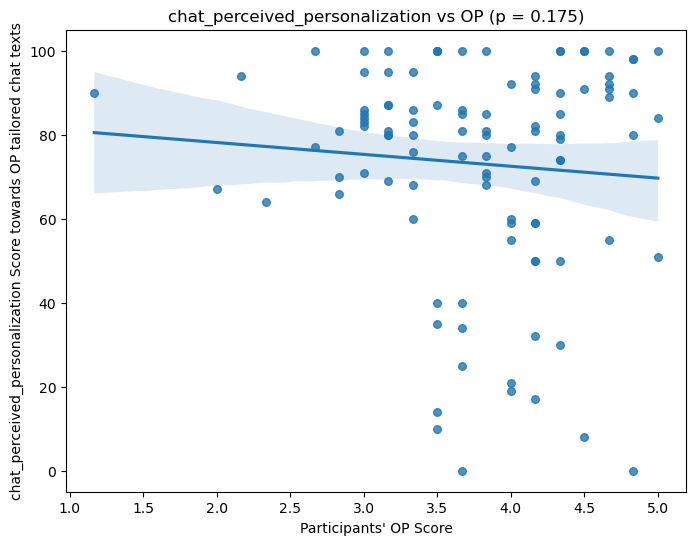


--------------------------------------------------
chat_perceived_personalization CO (Full Model)
--------------------------------------------------
                                    OLS Regression Results                                   
Dep. Variable:     chat_perceived_personalization_CO   R-squared:                       0.286
Model:                                           OLS   Adj. R-squared:                  0.134
Method:                                Least Squares   F-statistic:                     1.888
Date:                               Fri, 26 Jul 2024   Prob (F-statistic):             0.0276
Time:                                       19:13:23   Log-Likelihood:                -454.95
No. Observations:                                104   AIC:                             947.9
Df Residuals:                                     85   BIC:                             998.1
Df Model:                                         18                                         
Cova

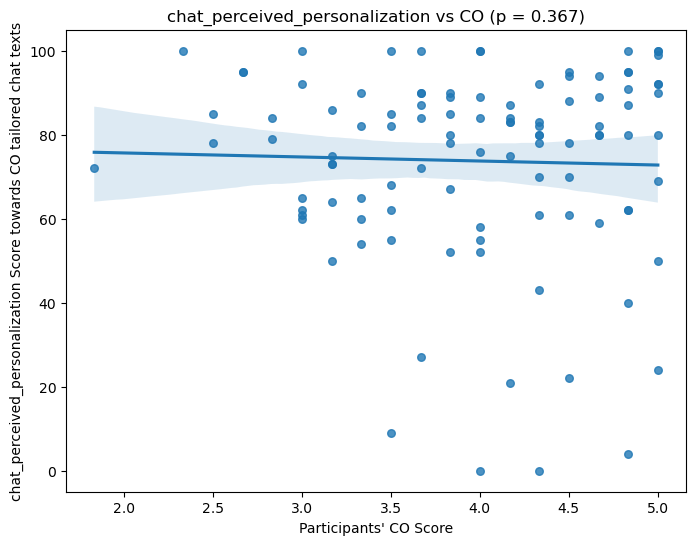


--------------------------------------------------
chat_perceived_personalization EX (Full Model)
--------------------------------------------------
                                    OLS Regression Results                                   
Dep. Variable:     chat_perceived_personalization_EX   R-squared:                       0.272
Model:                                           OLS   Adj. R-squared:                  0.118
Method:                                Least Squares   F-statistic:                     1.763
Date:                               Fri, 26 Jul 2024   Prob (F-statistic):             0.0438
Time:                                       19:13:23   Log-Likelihood:                -469.67
No. Observations:                                104   AIC:                             977.3
Df Residuals:                                     85   BIC:                             1028.
Df Model:                                         18                                         
Cova

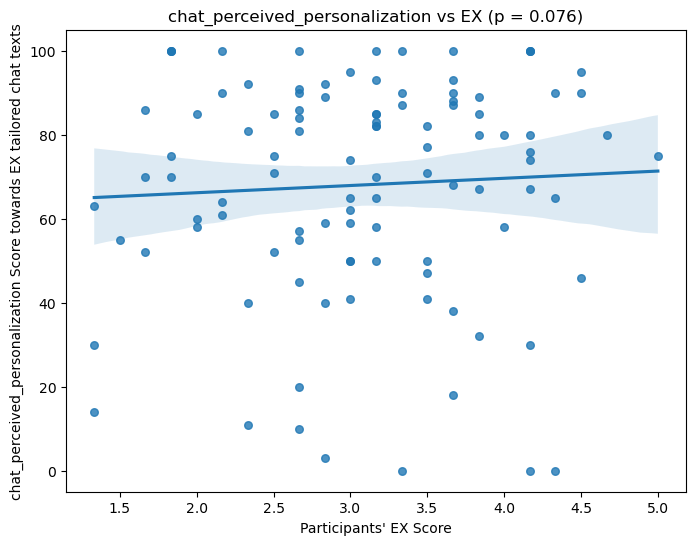


--------------------------------------------------
chat_perceived_personalization AG (Full Model)
--------------------------------------------------
                                    OLS Regression Results                                   
Dep. Variable:     chat_perceived_personalization_AG   R-squared:                       0.251
Model:                                           OLS   Adj. R-squared:                  0.092
Method:                                Least Squares   F-statistic:                     1.582
Date:                               Fri, 26 Jul 2024   Prob (F-statistic):             0.0833
Time:                                       19:13:23   Log-Likelihood:                -463.76
No. Observations:                                104   AIC:                             965.5
Df Residuals:                                     85   BIC:                             1016.
Df Model:                                         18                                         
Cova

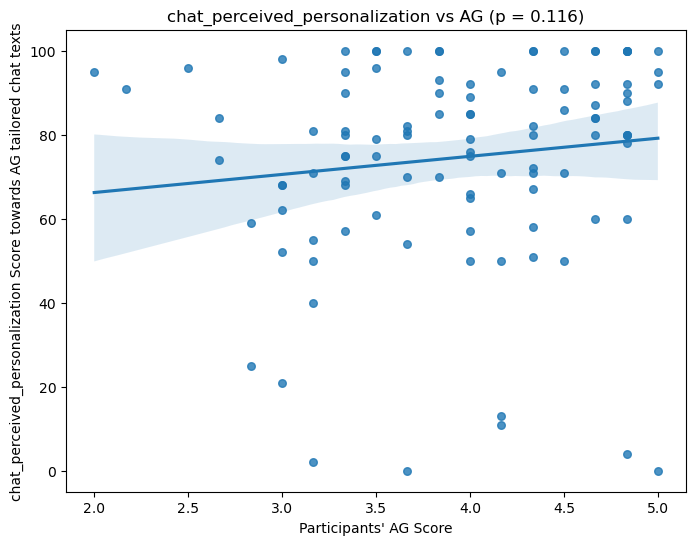


--------------------------------------------------
chat_overall_attitude OP (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_OP   R-squared:                       0.245
Model:                                  OLS   Adj. R-squared:                  0.085
Method:                       Least Squares   F-statistic:                     1.533
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):             0.0985
Time:                              19:13:24   Log-Likelihood:                -457.23
No. Observations:                       104   AIC:                             952.5
Df Residuals:                            85   BIC:                             1003.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

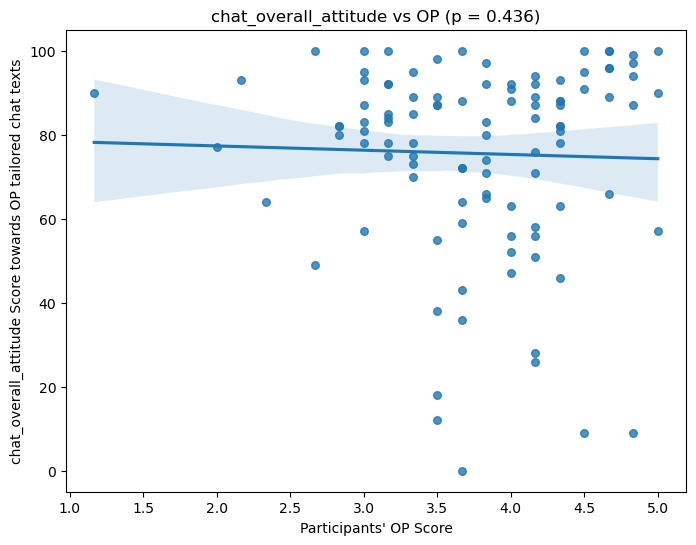


--------------------------------------------------
chat_overall_attitude CO (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_CO   R-squared:                       0.205
Model:                                  OLS   Adj. R-squared:                  0.037
Method:                       Least Squares   F-statistic:                     1.219
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):              0.265
Time:                              19:13:24   Log-Likelihood:                -453.40
No. Observations:                       104   AIC:                             944.8
Df Residuals:                            85   BIC:                             995.0
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

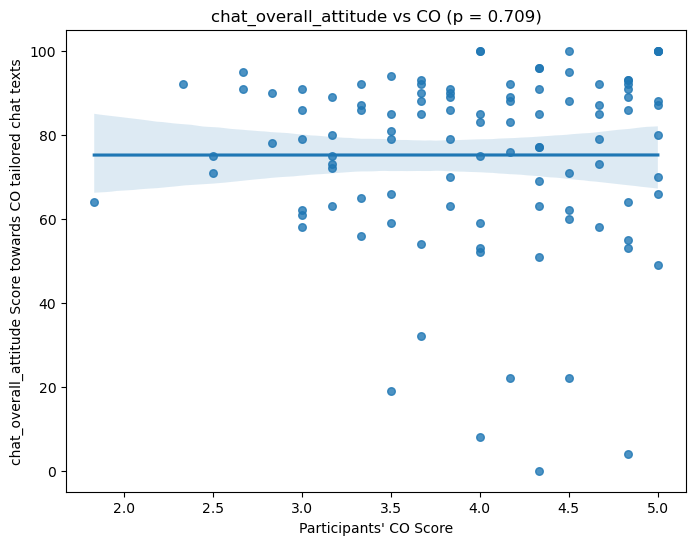


--------------------------------------------------
chat_overall_attitude EX (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_EX   R-squared:                       0.251
Model:                                  OLS   Adj. R-squared:                  0.093
Method:                       Least Squares   F-statistic:                     1.586
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):             0.0821
Time:                              19:13:25   Log-Likelihood:                -461.47
No. Observations:                       104   AIC:                             960.9
Df Residuals:                            85   BIC:                             1011.
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

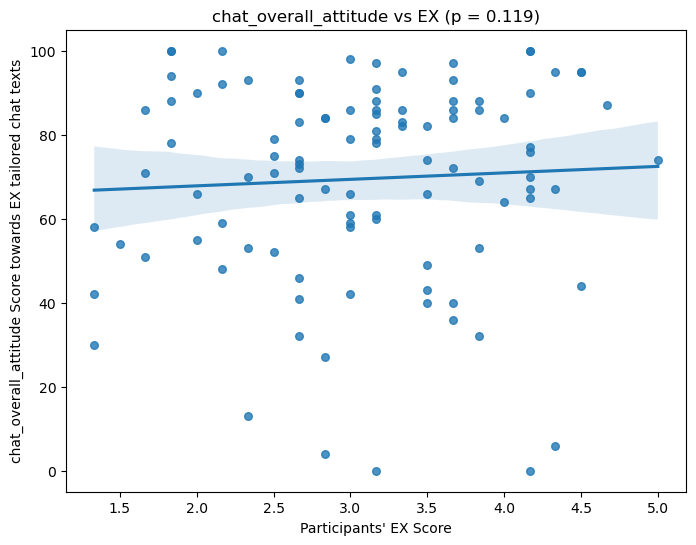


--------------------------------------------------
chat_overall_attitude AG (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_AG   R-squared:                       0.201
Model:                                  OLS   Adj. R-squared:                  0.031
Method:                       Least Squares   F-statistic:                     1.185
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):              0.292
Time:                              19:13:25   Log-Likelihood:                -452.45
No. Observations:                       104   AIC:                             942.9
Df Residuals:                            85   BIC:                             993.1
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
         

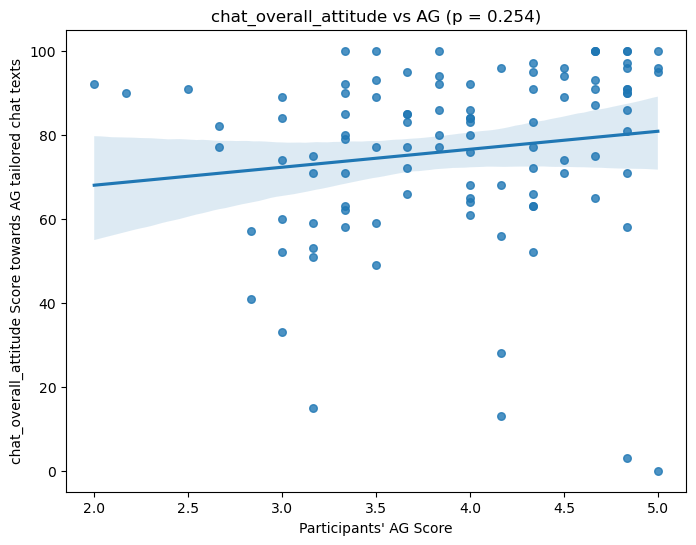


--------------------------------------------------
chat_engagement OP (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_OP   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1.578
Date:                Fri, 26 Jul 2024   Prob (F-statistic):             0.0844
Time:                        19:13:25   Log-Likelihood:                -466.95
No. Observations:                 104   AIC:                             971.9
Df Residuals:                      85   BIC:                             1022.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025  


--------------------------------------------------
chat_engagement CO (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_CO   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.735
Date:                Fri, 26 Jul 2024   Prob (F-statistic):             0.0484
Time:                        19:13:26   Log-Likelihood:                -460.95
No. Observations:                 104   AIC:                             959.9
Df Residuals:                      85   BIC:                             1010.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025  


--------------------------------------------------
chat_engagement EX (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_EX   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.466
Date:                Fri, 26 Jul 2024   Prob (F-statistic):            0.00294
Time:                        19:13:26   Log-Likelihood:                -462.25
No. Observations:                 104   AIC:                             962.5
Df Residuals:                      85   BIC:                             1013.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025  

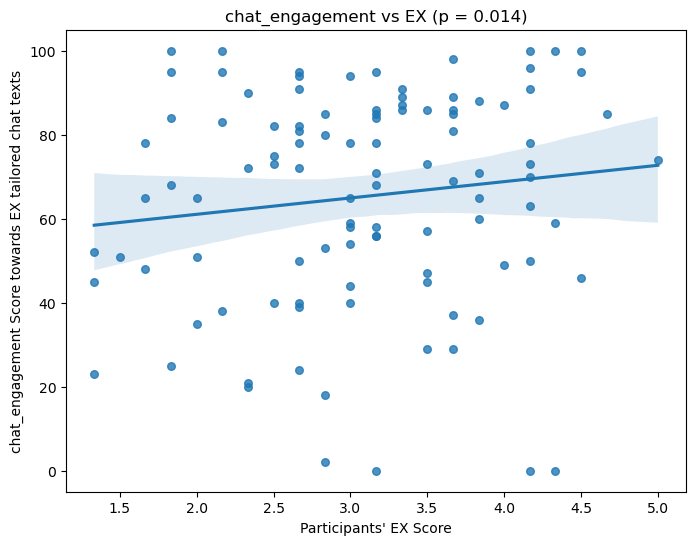


--------------------------------------------------
chat_engagement AG (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_AG   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     2.199
Date:                Fri, 26 Jul 2024   Prob (F-statistic):            0.00842
Time:                        19:13:26   Log-Likelihood:                -464.22
No. Observations:                 104   AIC:                             966.4
Df Residuals:                      85   BIC:                             1017.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025  

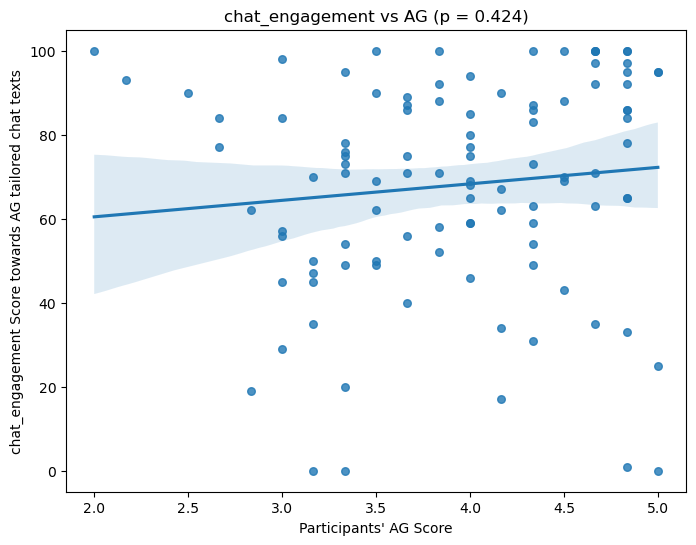

In [148]:
X = chat_big5_df_final.iloc[:,1:]

continuous_columns = []
dummy_columns = []

for col in X.columns:
    if 'race_' in col or 'employment_' in col or 'gender_' in col or 'education_' in col:
        dummy_columns.append(col)
    else:
        continuous_columns.append(col)

scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_columns])
X_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = sm.add_constant(X)

Study2b_1_results_list = []
Study2b_1_plot_list = []

for construct in chat_constructs:
    for big5_type in big5_types:
        col = construct + '_' + big5_type
        y = chat_scores_df[col]
        
        # Fit the model with all data points
        model_full = sm.OLS(y, X)
        results_full = model_full.fit()
        
        print(f"\n{'-'*50}\n{construct} {big5_type} (Full Model)\n{'-'*50}")
        print(results_full.summary())
        
        # Check regression assumptions and store results
        results_full.assumption_results = check_regression_assumptions(results_full, X, y)
        
        Study2b_1_results_list.append((results_full, None))
        
        # Plotting (using full dataset for visualization)
        col_flag = big5_lookup[big5_type]
        p_value = results_full.pvalues[col_flag]
        plt.figure(figsize=(8, 6))
        sns.regplot(x=chat_big5_df_final[col_flag], y=y, ci=95, scatter_kws={"s": 30})
        plt.xlabel(f"Participants' {big5_type} Score")
        plt.ylabel(f"{construct} Score towards {big5_type} tailored chat texts")
        plt.title(f"{construct} vs {big5_type} (p = {p_value:.3f})")

        # Save or show the plot
        Study2b_1_plot_list.append(plt)
        plt.show()


#### Study2b.2

Study2b.2: [y] 'chat_overall_attitude' scores for each of 4 versions vs [X] 'chat_perceived_personalization' scores for each of 4 versions & matched big5 scores for each of 4 versions, controlling for socioeconomic 



In [149]:
# Definition of X
# 1. big 5 trait scores + socio economics = chat_big5_df_final.iloc[:,1:]
# 2. chat_perceived_personalization for each of 4 personality traits

# Definition of y
# chat_overall_attitude for each of 4 personality traits

X = chat_big5_df_final.iloc[:,1:]
X_target_constructs = ['chat_perceived_personalization']
y_target_constract = 'chat_overall_attitude'

for construct in X_target_constructs:
    for big5_type in big5_types:
        col_name = construct + '_' + big5_type
        
        X[col_name] = chat_scores_df[col_name]

continuous_columns = []
dummy_columns = []

for col in X.columns:
    if 'race_' in col or 'employment_' in col or 'gender_' in col or 'education_' in col:
        dummy_columns.append(col)
    else:
        continuous_columns.append(col)

scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_columns])
X_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = sm.add_constant(X)


--------------------------------------------------
chat_overall_attitude OP (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_OP   R-squared:                       0.870
Model:                                  OLS   Adj. R-squared:                  0.835
Method:                       Least Squares   F-statistic:                     24.63
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           3.88e-27
Time:                              19:22:25   Log-Likelihood:                -365.77
No. Observations:                       104   AIC:                             777.5
Df Residuals:                            81   BIC:                             838.4
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         


--------------------------------------------------
chat_overall_attitude CO (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_CO   R-squared:                       0.895
Model:                                  OLS   Adj. R-squared:                  0.866
Method:                       Least Squares   F-statistic:                     31.35
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           9.17e-31
Time:                              19:22:26   Log-Likelihood:                -348.18
No. Observations:                       104   AIC:                             742.4
Df Residuals:                            81   BIC:                             803.2
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

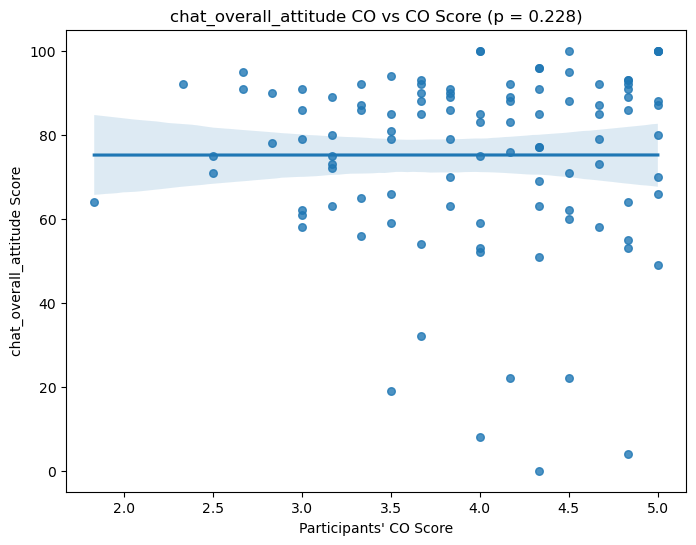

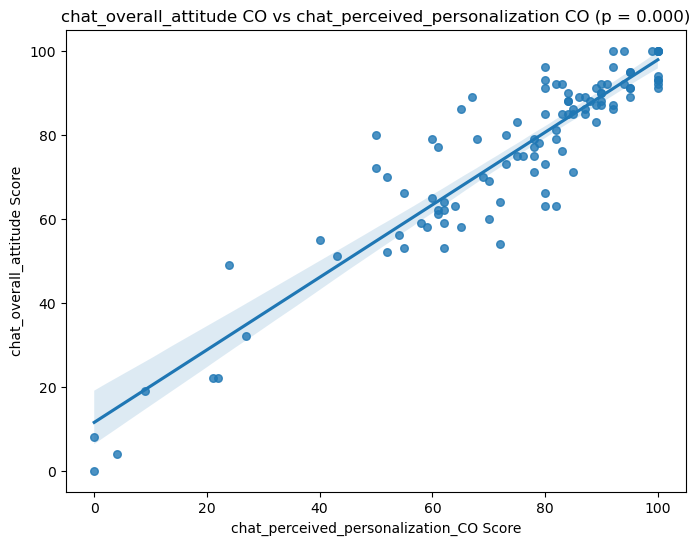


--------------------------------------------------
chat_overall_attitude EX (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_EX   R-squared:                       0.790
Model:                                  OLS   Adj. R-squared:                  0.732
Method:                       Least Squares   F-statistic:                     13.82
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           4.41e-19
Time:                              19:22:27   Log-Likelihood:                -395.47
No. Observations:                       104   AIC:                             836.9
Df Residuals:                            81   BIC:                             897.8
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

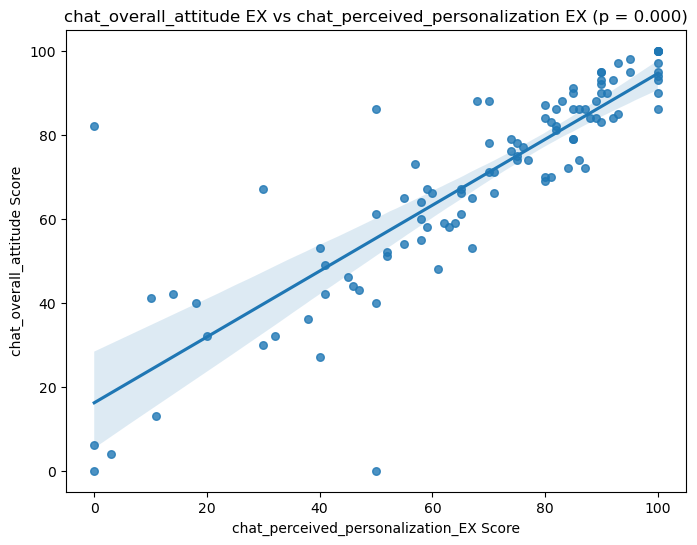


--------------------------------------------------
chat_overall_attitude AG (Full Model)
--------------------------------------------------
                               OLS Regression Results                               
Dep. Variable:     chat_overall_attitude_AG   R-squared:                       0.828
Model:                                  OLS   Adj. R-squared:                  0.781
Method:                       Least Squares   F-statistic:                     17.69
Date:                      Fri, 26 Jul 2024   Prob (F-statistic):           2.12e-22
Time:                              19:22:27   Log-Likelihood:                -372.64
No. Observations:                       104   AIC:                             791.3
Df Residuals:                            81   BIC:                             852.1
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
         

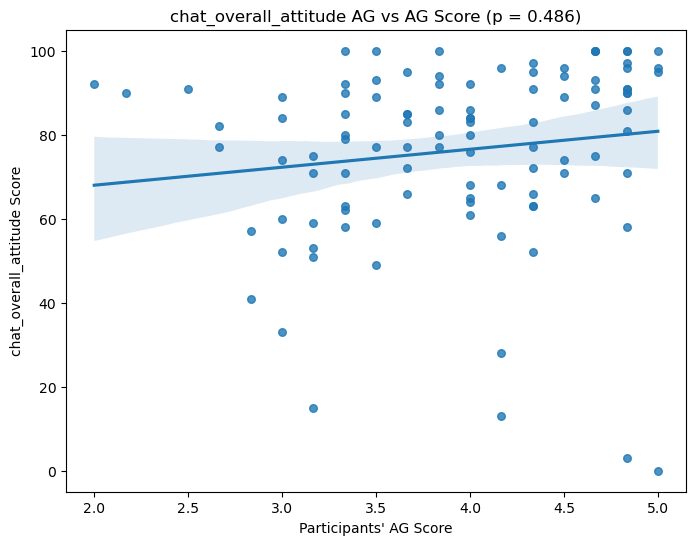

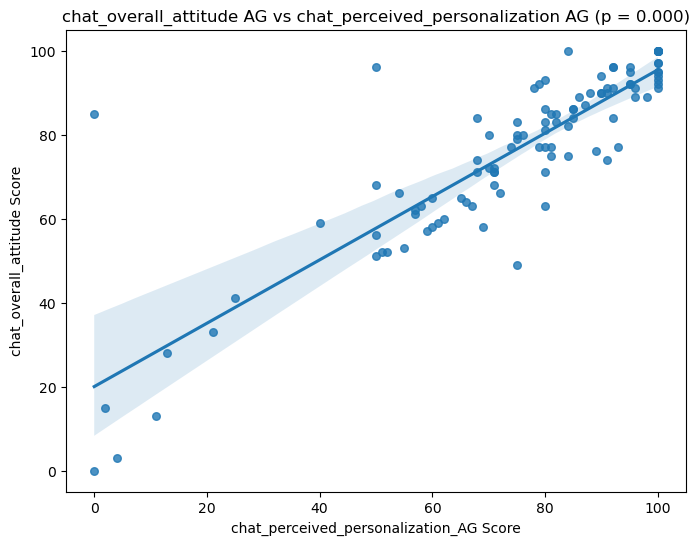

In [151]:
Study2b_2_results_list = []
Study2b_2_plot_list = []

fit_OLS_and_draw_plot(chat_scores_df, Study2b_2_results_list, Study2b_2_plot_list)

In [153]:
save_all_regression_results(Study2b_2_results_list, 
                            'chat_perceived_personalization',
                            'presentation_for_paper/tmp/study2b_2_results.csv')

Results saved to presentation_for_paper/tmp/study2b_2_results.csv


#### Study2b.3

Study2b.3: [y] 'chat_engagement' scores for each of 4 versions vs [X] 'chat_overall_attitude' scores for each of 4 versions & matched big5 scores for each of 4 versions & 'chat_perceived_personalization' scores for each of 4 versions, controlling for socioeconomic 

In [154]:
# Definition of X
# 1. big 5 trait scores + socio economics = chat_big5_df_final.iloc[:,1:]
# 2. chat_perceived_personalization for each of 4 personality traits
# 3. chat_overall_attitude for each of 4 personality traits

# Definition of y
# chat_engagement for each of 4 personality traits

X = chat_big5_df_final.iloc[:,1:]
X_target_constructs = ['chat_perceived_personalization', 'chat_overall_attitude']
y_target_constract = 'chat_engagement'

for construct in X_target_constructs:
    for big5_type in big5_types:
        col_name = construct + '_' + big5_type
        
        X[col_name] = chat_scores_df[col_name]

continuous_columns = []
dummy_columns = []

for col in X.columns:
    if 'race_' in col or 'employment_' in col or 'gender_' in col or 'education_' in col:
        dummy_columns.append(col)
    else:
        continuous_columns.append(col)

scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_columns])
X_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_columns)
X_scaled = pd.concat([X_continuous_scaled, X[dummy_columns].reset_index(drop=True)], axis=1)

X = sm.add_constant(X)


--------------------------------------------------
chat_engagement OP (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_OP   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     9.280
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.04e-14
Time:                        19:25:15   Log-Likelihood:                -408.15
No. Observations:                 104   AIC:                             870.3
Df Residuals:                      77   BIC:                             941.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|

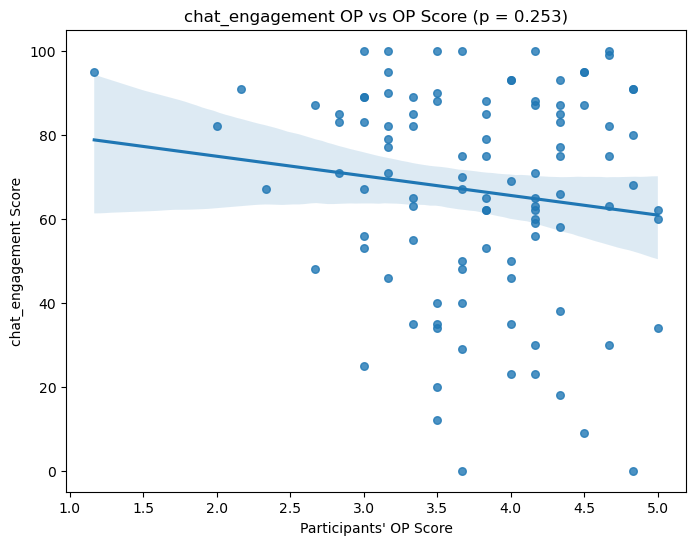

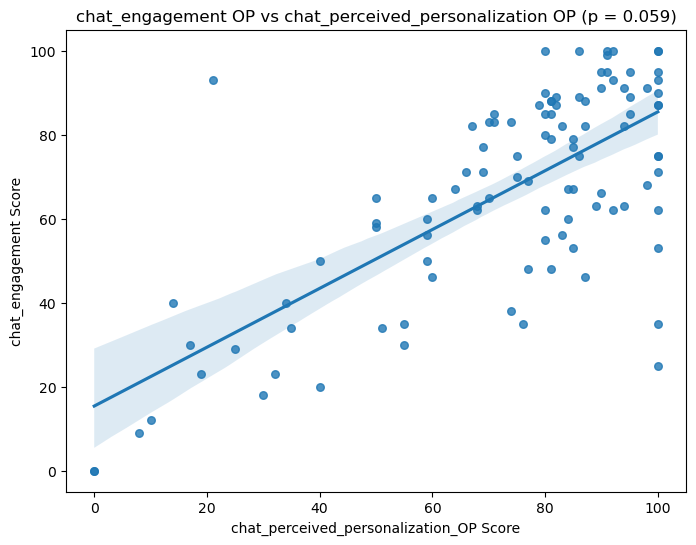

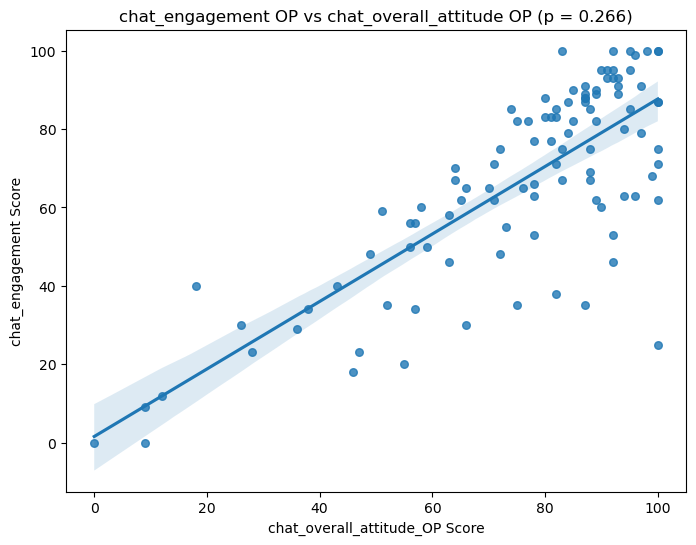


--------------------------------------------------
chat_engagement CO (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_CO   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     9.321
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           9.21e-15
Time:                        19:25:16   Log-Likelihood:                -403.25
No. Observations:                 104   AIC:                             860.5
Df Residuals:                      77   BIC:                             931.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|

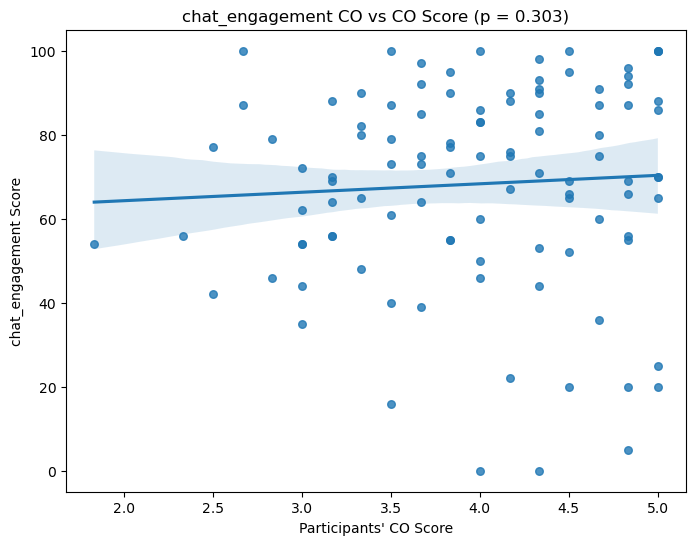

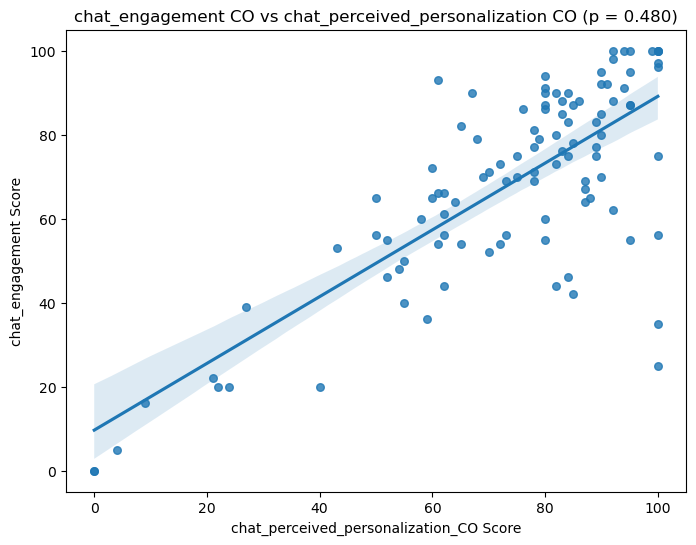

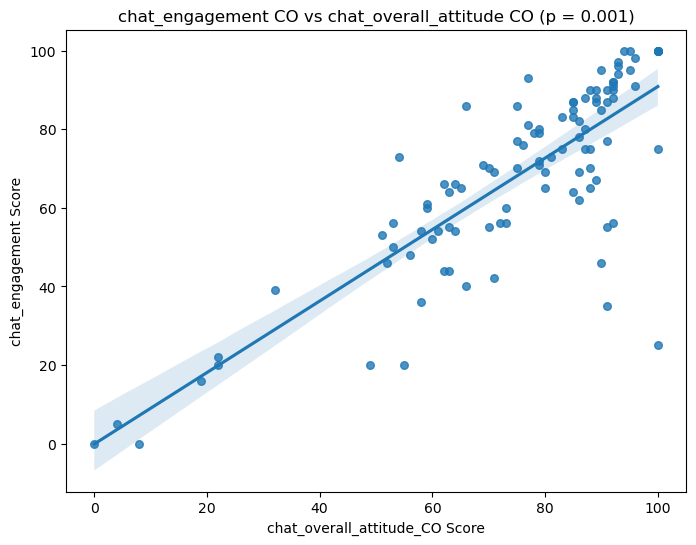


--------------------------------------------------
chat_engagement EX (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_EX   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     13.74
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.71e-19
Time:                        19:25:17   Log-Likelihood:                -394.16
No. Observations:                 104   AIC:                             842.3
Df Residuals:                      77   BIC:                             913.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|

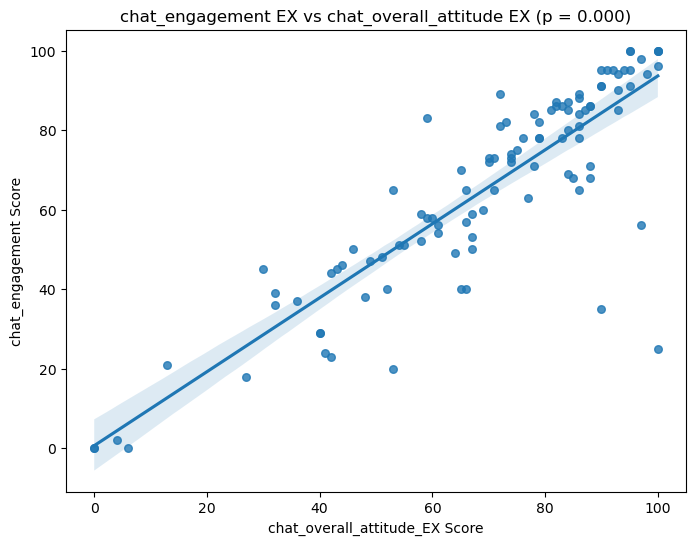


--------------------------------------------------
chat_engagement AG (Full Model)
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:     chat_engagement_AG   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     9.057
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.96e-14
Time:                        19:25:18   Log-Likelihood:                -411.26
No. Observations:                 104   AIC:                             876.5
Df Residuals:                      77   BIC:                             947.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|

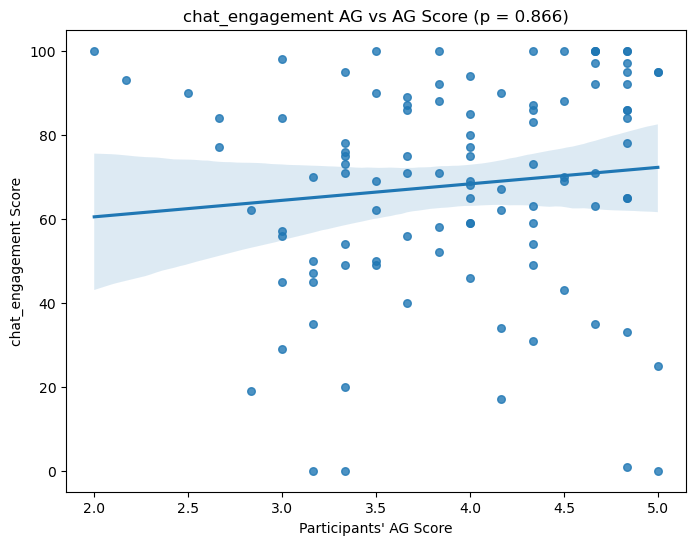

In [155]:
Study2b_3_results_list = []
Study2b_3_plot_list = []

fit_OLS_and_draw_plot(chat_scores_df, Study2b_3_results_list, Study2b_3_plot_list)

In [157]:
save_all_regression_results(Study2b_3_results_list, 
                            'chat_overall_attitude',
                            'presentation_for_paper/tmp/study2b_3_results.csv')

Results saved to presentation_for_paper/tmp/study2b_3_results.csv
